<a href="https://colab.research.google.com/github/diegoBarriaevolet/Diagrama-de-Flujo-evolet/blob/main/Analisis_osa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [8]:
df = pd.read_excel("data sciense cabritas.xlsx", sheet_name="Hoja3")


In [9]:
# 🔧 Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Mostrar gráficos inline
%matplotlib inline

In [10]:
df['Comuna'] = df['Local'].str.extract(r'\((.*?)\)')


In [11]:
pd.crosstab(df['Disponibilidad'], df['Revisar'], normalize='index')


Revisar               0        1
Disponibilidad                  
0.0             0.73655  0.26345
1.0             0.00000  1.00000

In [12]:
df_critico = df[(df['Valido'] == 0) & (df['Revisar'] == 1)]
df_critico[['Producto', 'Local', 'Precio', 'Disponibilidad']]


Empty DataFrame
Columns: [Producto, Local, Precio, Disponibilidad]
Index: []

In [13]:
df.columns = df.columns.str.strip()


In [14]:
# 🔧 Limpiar nombres de columnas: espacios, saltos de línea, tabs
df.columns = df.columns.str.strip().str.replace(r"[\r\n\t]", "", regex=True)


In [15]:
# Mostrar todos los nombres de columna exactos con sus índices
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")


0: 'Producto'
1: 'form_name'
2: 'form_state'
3: 'user_name'
4: 'deleted'
5: 'Hora'
6: 'Disponibilidad'
7: 'Precio'
8: 'Local'
9: 'Nombre_Form'
10: 'question_name'
11: 'updated_at'
12: 'L46_27_9'
13: 'Fecha'
14: 'Cadena'
15: 'Codigo_BIR'
16: 'Codigo_Evolet'
17: 'Holding'
18: 'Marca_Evolet_Maestra'
19: 'Codigo_retail'
20: 'CONCA_L_M'
21: 'Week'
22: 'Type of week'
23: 'Semana_Activa'
24: 'Filtro_BRU_SISA'
25: '1s'
26: 'Venta'
27: 'Stock'
28: 'Maestra_R'
29: 'Producto_Activo'
30: 'Valido'
31: 'Revisar'
32: 'Reintegrar'
33: 'CONCA VENDOR'
34: 'Check_blanco'
35: 'Empresa'
36: 'Bloqueo_datos'
37: 'Columna calculada 1'
38: 'Maestra_FILTRA'
39: 'CAMBIO'
40: 'Supervisor'
41: 'Comuna'


In [16]:
df.columns = df.columns.str.strip().str.replace(r"[\r\n\t]", "", regex=True)


In [17]:
df = pd.read_excel("data sciense cabritas.xlsx", sheet_name="Hoja3")
df.columns = df.columns.str.strip().str.replace(r"[\r\n\t]", "", regex=True)


In [18]:
df.groupby('Supervisor')[['Valido', 'Revisar']].mean()


Valido   Revisar
Supervisor                                     
ASTRID LAVIN TAPIA           0.698911  0.684143
BRIGITTE VALDEBENITO NEVEU   0.779446  0.769076
CLARA ACUÑA ALVAREZ          0.746149  0.727012
CRISTIAN BURDILES BARRIA     0.712769  0.702752
ESMERALDA HERMOSILLA TAPIA   0.751961  0.735759
GONZALO MOLINA ESPOSA        0.853110  0.847081
LEONARDO BARRERA VARGAS      0.783740  0.777934
MANUEL QUIROZ RUIZ           0.740194  0.724904
SIN DATO                     0.742857  0.653061
TATIANA ORTEGA QUEZADA       0.779090  0.769513
WIDNY JOSEPH                 0.773373  0.758554
WILLIAMS VILLALOBOS GARRIDO  0.599469  0.580523

In [19]:
df_model = pd.get_dummies(df[['Producto', 'Local', 'Supervisor', 'Precio', 'Disponibilidad']], drop_first=True)
y = df['Valido']


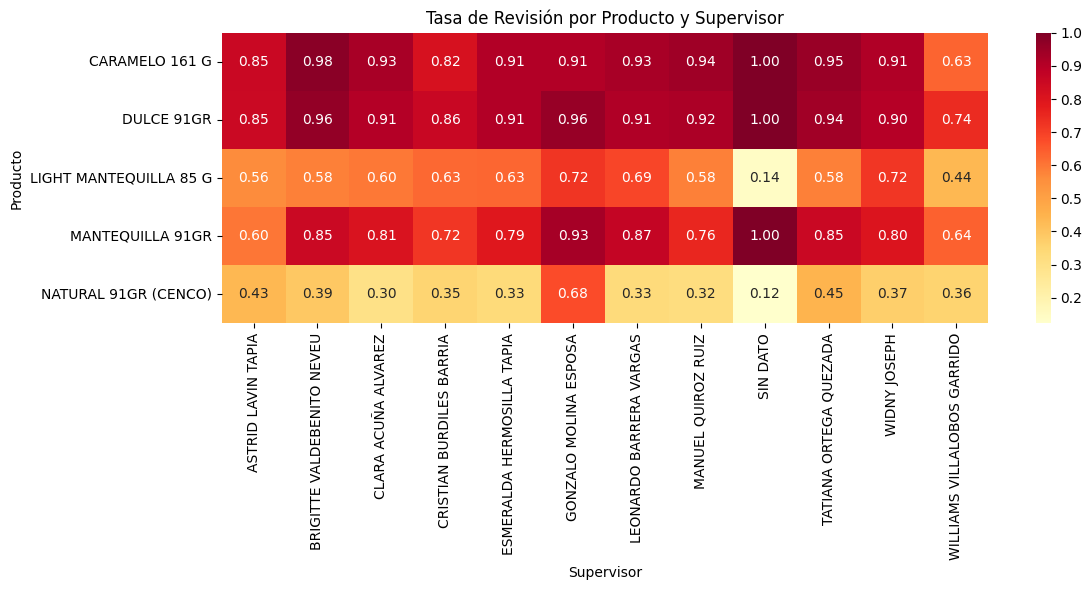

In [20]:
# 🔥 Heatmap Producto vs Supervisor por tasa de Revisión
pivot_sup = pd.pivot_table(df, values='Revisar', index='Producto', columns='Supervisor', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_sup, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Tasa de Revisión por Producto y Supervisor')
plt.tight_layout()
plt.show()


In [21]:
# 🧾 Crear resumen por Supervisor
resumen_sup = df.groupby('Supervisor').agg({
    'Precio': ['mean', 'sum'],
    'Revisar': ['sum', 'mean'],
    'Valido': ['sum', 'mean']
})

# Renombrar columnas
resumen_sup.columns = [
    'Precio promedio', 'Ventas totales',
    'Total Revisar', 'Tasa Revisar',
    'Total Valido', 'Tasa Valido'
]

# Ordenar por tasa de revisión
resumen_sup = resumen_sup.sort_values('Tasa Revisar', ascending=False)

# Mostrar top 10
resumen_sup.head(10)


Precio promedio  Ventas totales  Total Revisar  \
Supervisor                                                                   
GONZALO MOLINA ESPOSA                   0.0               0           3091   
LEONARDO BARRERA VARGAS                 0.0               0           3885   
TATIANA ORTEGA QUEZADA                  0.0               0           5866   
BRIGITTE VALDEBENITO NEVEU              0.0               0           4969   
WIDNY JOSEPH                            0.0               0           6296   
ESMERALDA HERMOSILLA TAPIA              0.0               0           5722   
CLARA ACUÑA ALVAREZ                     0.0               0           7598   
MANUEL QUIROZ RUIZ                      0.0               0           5452   
CRISTIAN BURDILES BARRIA                0.0               0           5823   
ASTRID LAVIN TAPIA                      0.0               0           3706   

                            Tasa Revisar  Total Valido  Tasa Valido  
Supervisor                                                           
GONZALO MOLINA ESPOSA           0.847081          3113     0.853110  
LEONARDO BARRERA VARGAS         0.777934          3914     0.783740  
TATIANA ORTEGA QUEZADA          0.769513          5939     0.779090  
BRIGITTE VALDEBENITO NEVEU      0.769076          5036     0.779446  
WIDNY JOSEPH                    0.758554          6419     0.773373  
ESMERALDA HERMOSILLA TAPIA      0.735759          5848     0.751961  
CLARA ACUÑA ALVAREZ             0.727012          7798     0.746149  
MANUEL QUIROZ RUIZ              0.724904          5567     0.740194  
CRISTIAN BURDILES BARRIA        0.702752          5906     0.712769  
ASTRID LAVIN TAPIA              0.684143          3786     0.698911

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

local_features = df.groupby('Local')[['Precio', 'Disponibilidad', 'Revisar', 'Valido']].mean()
scaled = StandardScaler().fit_transform(local_features)

kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled)
local_features['Cluster'] = kmeans.labels_


In [23]:
# 🔍 Preparar datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Variables predictoras y objetivo
X_knn = pd.get_dummies(df[['Producto', 'Local', 'Supervisor', 'Precio', 'Disponibilidad']], drop_first=True)
y_knn = df['Revisar']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Preparar datos y eliminar NaN

In [24]:
# 🔧 Filtrar columnas y eliminar filas con NaN
df_knn = df[['Producto', 'Local', 'Supervisor', 'Precio', 'Disponibilidad', 'Revisar']].dropna()

# Variables predictoras y objetivo
X_knn = pd.get_dummies(df_knn[['Producto', 'Local', 'Supervisor', 'Precio', 'Disponibilidad']], drop_first=True)
y_knn = df_knn['Revisar']


 Entrenar modelo KNN + evaluación

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separar y escalar
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Reporte
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5819
           1       0.97      0.97      0.97     16190

    accuracy                           0.96     22009
   macro avg       0.94      0.94      0.94     22009
weighted avg       0.96      0.96      0.96     22009



Visualización  Modelo KNN Regresión logística

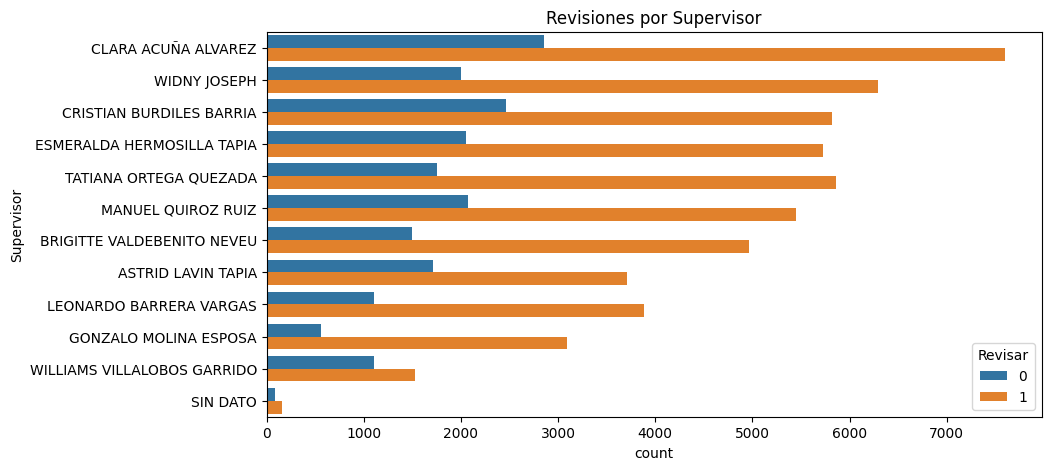

In [26]:
# 📊 Gráfico
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Supervisor', hue='Revisar', order=df['Supervisor'].value_counts().index)
plt.title('Revisiones por Supervisor')
plt.show()


In [27]:
# 🤖 KNN + 📈 Regresión
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df1 = df[['Supervisor', 'user_name', 'Revisar']].dropna()
X1 = pd.get_dummies(df1[['Supervisor', 'user_name']], drop_first=True)
y1 = df1['Revisar']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# KNN
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X1_train_scaled, y1_train)
print("🔵 KNN")
print(classification_report(y1_test, knn1.predict(X1_test_scaled)))

# Regresión
logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X1_train_scaled, y1_train)
print("🟠 Regresión")
print(classification_report(y1_test, logreg1.predict(X1_test_scaled)))


🔵 KNN
              precision    recall  f1-score   support

           0       0.33      0.10      0.15      5760
           1       0.74      0.93      0.83     16249

    accuracy                           0.71     22009
   macro avg       0.54      0.51      0.49     22009
weighted avg       0.64      0.71      0.65     22009

🟠 Regresión
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5760
           1       0.74      1.00      0.85     16249

    accuracy                           0.74     22009
   macro avg       0.37      0.50      0.42     22009
weighted avg       0.55      0.74      0.63     22009



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


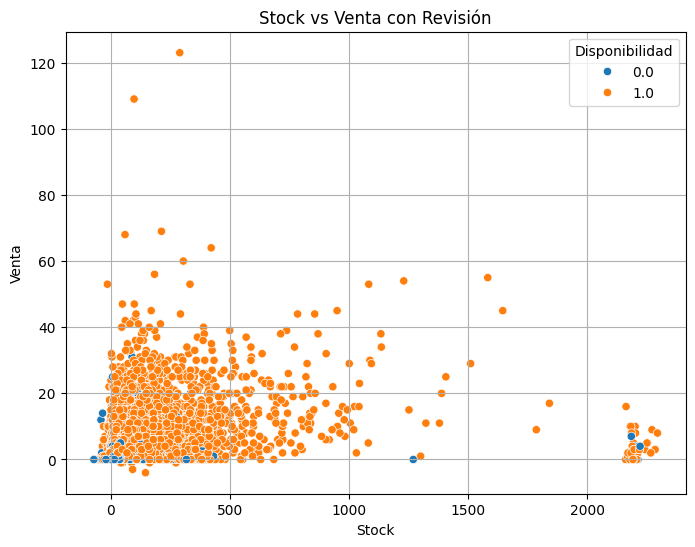

In [30]:
# 📊 Gráfico
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Stock', y='Venta', hue='Disponibilidad')
plt.title('Stock vs Venta con Revisión')
plt.xlabel('Stock')
plt.ylabel('Venta')
plt.grid(True)
plt.show()


In [36]:
# 🤖 KNN y 📈 Regresión
df3 = df[['Stock', 'Venta', 'Revisar']].dropna()
X3 = df3[['Stock', 'Venta']]
y3 = df3['Revisar']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X3_train, y3_train)
print("🔵 KNN")
print(classification_report(y3_test, knn3.predict(X3_test)))

logreg3 = LogisticRegression()
logreg3.fit(X3_train, y3_train)
print("🟠 Regresión")
print(classification_report(y3_test, logreg3.predict(X3_test)))


🔵 KNN
              precision    recall  f1-score   support

           0       0.54      0.22      0.31       732
           1       0.97      0.99      0.98     15982

    accuracy                           0.96     16714
   macro avg       0.75      0.61      0.65     16714
weighted avg       0.95      0.96      0.95     16714

🟠 Regresión
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       732
           1       0.96      1.00      0.98     15982

    accuracy                           0.96     16714
   macro avg       0.48      0.50      0.49     16714
weighted avg       0.91      0.96      0.93     16714



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



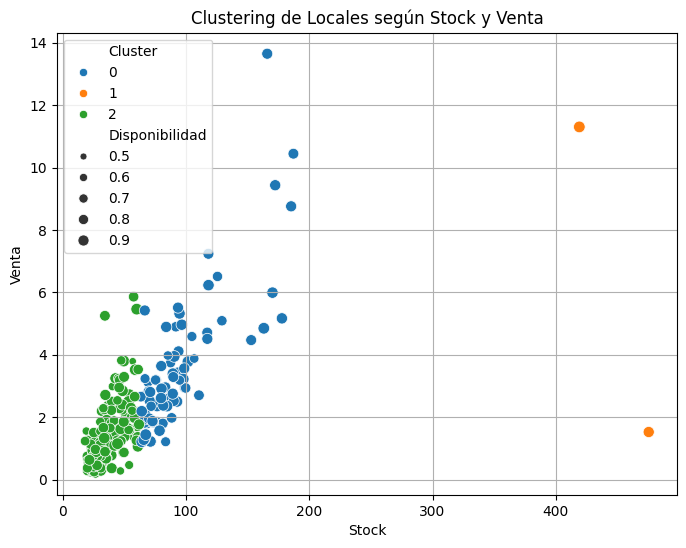

In [33]:
# 📊 Clustering visual
data_cluster = df[['Local', 'Stock', 'Venta','Disponibilidad']].dropna()
data_agrupada = data_cluster.groupby('Local')[['Stock', 'Venta', 'Disponibilidad']].mean()

modelo_kmeans = KMeans(n_clusters=3, random_state=42)
data_agrupada['Cluster'] = modelo_kmeans.fit_predict(data_agrupada)

plt.figure(figsize=(8,6))
sns.scatterplot(data=data_agrupada, x='Stock', y='Venta', hue='Cluster', size="Disponibilidad", palette='tab10')
plt.title('Clustering de Locales según Stock y Venta')
plt.grid(True)
plt.show()


In [38]:
# 🤖 KNN y 📈 Regresión para predecir Revisión desde Local, Stock, Venta
df4 = df[['Local', 'Stock', 'Venta', 'Revisar']].dropna()
X4 = pd.get_dummies(df4[['Local', 'Stock', 'Venta']], drop_first=True)
y4 = df4['Revisar']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(X4_train, y4_train)
print("🔵 KNN")
print(classification_report(y4_test, knn4.predict(X4_test)))

logreg4 = LogisticRegression(max_iter=1000)
logreg4.fit(X4_train, y4_train)
print("🟠 Regresión")
print(classification_report(y4_test, logreg4.predict(X4_test)))


🔵 KNN
              precision    recall  f1-score   support

           0       0.63      0.33      0.43       732
           1       0.97      0.99      0.98     15982

    accuracy                           0.96     16714
   macro avg       0.80      0.66      0.71     16714
weighted avg       0.95      0.96      0.96     16714

🟠 Regresión
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       732
           1       0.96      1.00      0.98     15982

    accuracy                           0.96     16714
   macro avg       0.48      0.50      0.49     16714
weighted avg       0.91      0.96      0.93     16714



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Cadena + Producto → Revisar

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

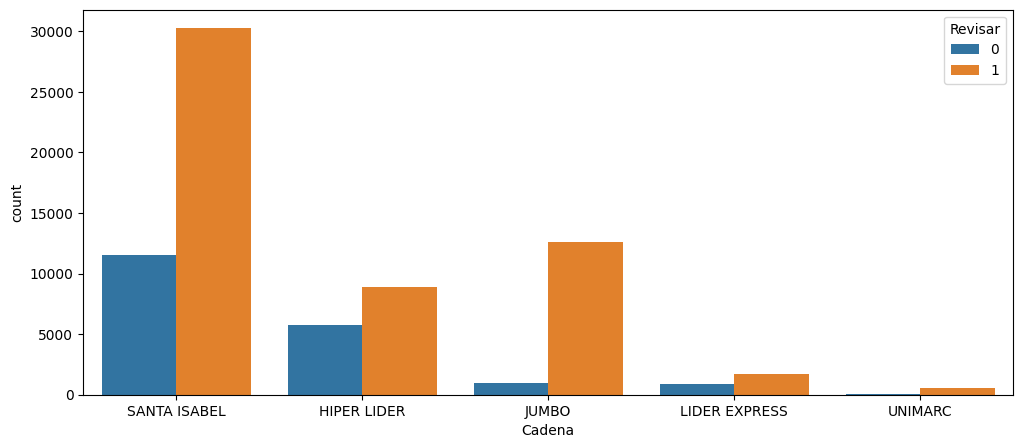

In [39]:
# 📊 Gráfico
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Cadena', hue='Revisar', order=df['Cadena'].value_counts().index)
plt.title


In [40]:
# 🤖 KNN y 📈 Regresión
df6 = df[['Cadena', 'Producto', 'Revisar']].dropna()
X6 = pd.get_dummies(df6[['Cadena', 'Producto']], drop_first=True)
y6 = df6['Revisar']
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=42)

knn6 = KNeighborsClassifier(n_neighbors=5)
knn6.fit(X6_train, y6_train)
print("🔵 KNN")
print(classification_report(y6_test, knn6.predict(X6_test)))

logreg6 = LogisticRegression(max_iter=1000)
logreg6.fit(X6_train, y6_train)
print("🟠 Regresión")
print(classification_report(y6_test, logreg6.predict(X6_test)))


🔵 KNN
              precision    recall  f1-score   support

           0       0.71      0.44      0.54      5760
           1       0.82      0.94      0.88     16249

    accuracy                           0.81     22009
   macro avg       0.77      0.69      0.71     22009
weighted avg       0.79      0.81      0.79     22009

🟠 Regresión
              precision    recall  f1-score   support

           0       0.68      0.45      0.54      5760
           1       0.83      0.93      0.87     16249

    accuracy                           0.80     22009
   macro avg       0.75      0.69      0.71     22009
weighted avg       0.79      0.80      0.79     22009



In [41]:
df.groupby('Supervisor')['Venta'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)


mean      sum
Supervisor                                    
CRISTIAN BURDILES BARRIA     2.679491  16018.0
GONZALO MOLINA ESPOSA        5.022920  15998.0
LEONARDO BARRERA VARGAS      3.304984  13329.0
CLARA ACUÑA ALVAREZ          1.323268  10430.0
TATIANA ORTEGA QUEZADA       1.614561   9647.0
ESMERALDA HERMOSILLA TAPIA   1.487418   8807.0
BRIGITTE VALDEBENITO NEVEU   1.510859   7722.0
WIDNY JOSEPH                 1.153703   7446.0
ASTRID LAVIN TAPIA           1.747371   6647.0
MANUEL QUIROZ RUIZ           1.094607   6109.0
WILLIAMS VILLALOBOS GARRIDO  1.025593   1643.0
SIN DATO                     0.427027     79.0

In [42]:
df.groupby('Supervisor')[['Revisar', 'Valido']].mean().sort_values('Revisar', ascending=False)


Revisar    Valido
Supervisor                                     
GONZALO MOLINA ESPOSA        0.847081  0.853110
LEONARDO BARRERA VARGAS      0.777934  0.783740
TATIANA ORTEGA QUEZADA       0.769513  0.779090
BRIGITTE VALDEBENITO NEVEU   0.769076  0.779446
WIDNY JOSEPH                 0.758554  0.773373
ESMERALDA HERMOSILLA TAPIA   0.735759  0.751961
CLARA ACUÑA ALVAREZ          0.727012  0.746149
MANUEL QUIROZ RUIZ           0.724904  0.740194
CRISTIAN BURDILES BARRIA     0.702752  0.712769
ASTRID LAVIN TAPIA           0.684143  0.698911
SIN DATO                     0.653061  0.742857
WILLIAMS VILLALOBOS GARRIDO  0.580523  0.599469

In [43]:
df.groupby('Supervisor').agg({
    'Venta': ['sum', 'mean'],
    'Revisar': 'mean',
    'Valido': 'mean',
    'Stock': 'mean'
}).sort_values(('Venta', 'sum'), ascending=False)


Venta             Revisar    Valido      Stock
                                 sum      mean      mean      mean       mean
Supervisor                                                                   
CRISTIAN BURDILES BARRIA     16018.0  2.679491  0.702752  0.712769  77.114252
GONZALO MOLINA ESPOSA        15998.0  5.022920  0.847081  0.853110  81.505181
LEONARDO BARRERA VARGAS      13329.0  3.304984  0.777934  0.783740  83.806348
CLARA ACUÑA ALVAREZ          10430.0  1.323268  0.727012  0.746149  40.921720
TATIANA ORTEGA QUEZADA        9647.0  1.614561  0.769513  0.779090  41.478159
ESMERALDA HERMOSILLA TAPIA    8807.0  1.487418  0.735759  0.751961  65.038676
BRIGITTE VALDEBENITO NEVEU    7722.0  1.510859  0.769076  0.779446  41.716494
WIDNY JOSEPH                  7446.0  1.153703  0.758554  0.773373  37.187945
ASTRID LAVIN TAPIA            6647.0  1.747371  0.684143  0.698911  44.955047
MANUEL QUIROZ RUIZ            6109.0  1.094607  0.724904  0.740194  41.594159
WILLIAMS VILLALOBOS GARRIDO   1643.0  1.025593  0.580523  0.599469  38.052434
SIN DATO                        79.0  0.427027  0.653061  0.742857  21.767568

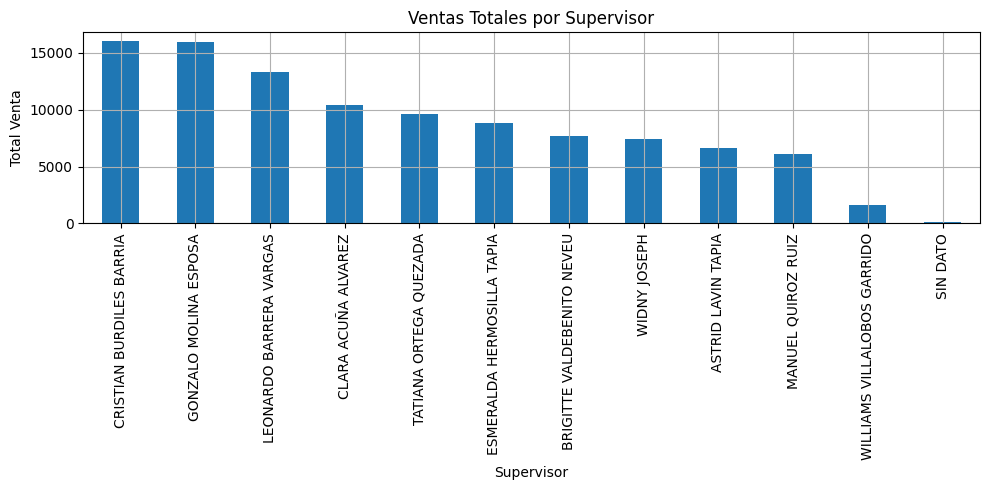

In [44]:
df.groupby('Supervisor')['Venta'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Ventas Totales por Supervisor')
plt.ylabel('Total Venta')
plt.grid(True)
plt.tight_layout()
plt.show()


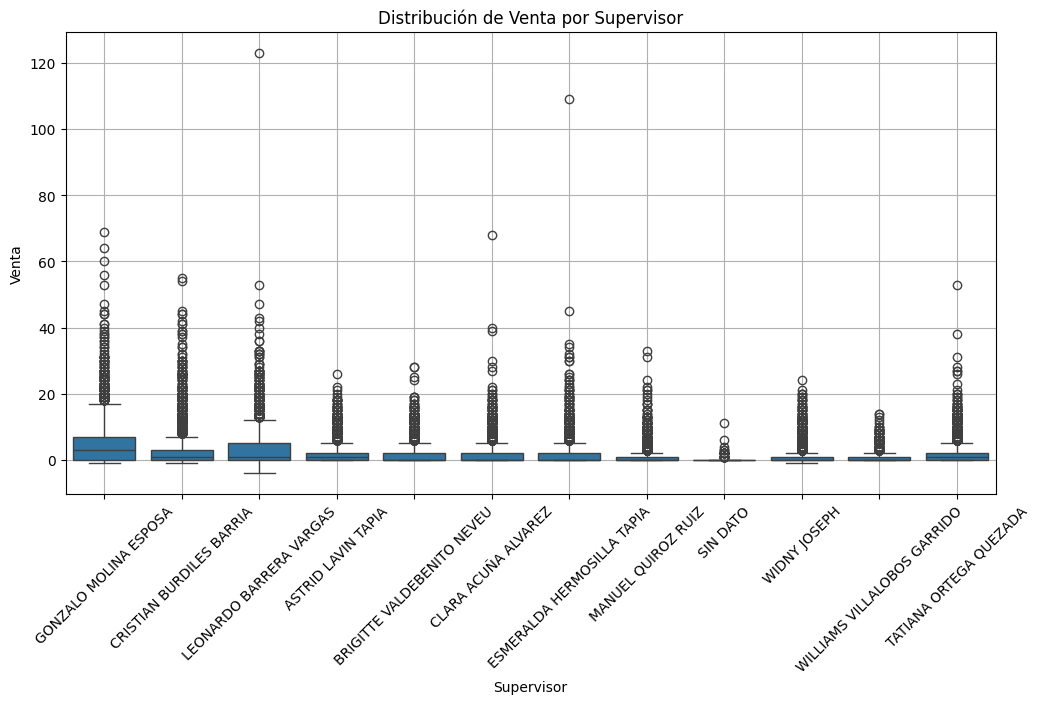

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Supervisor', y='Venta')
plt.xticks(rotation=45)
plt.title('Distribución de Venta por Supervisor')
plt.grid(True)
plt.show()


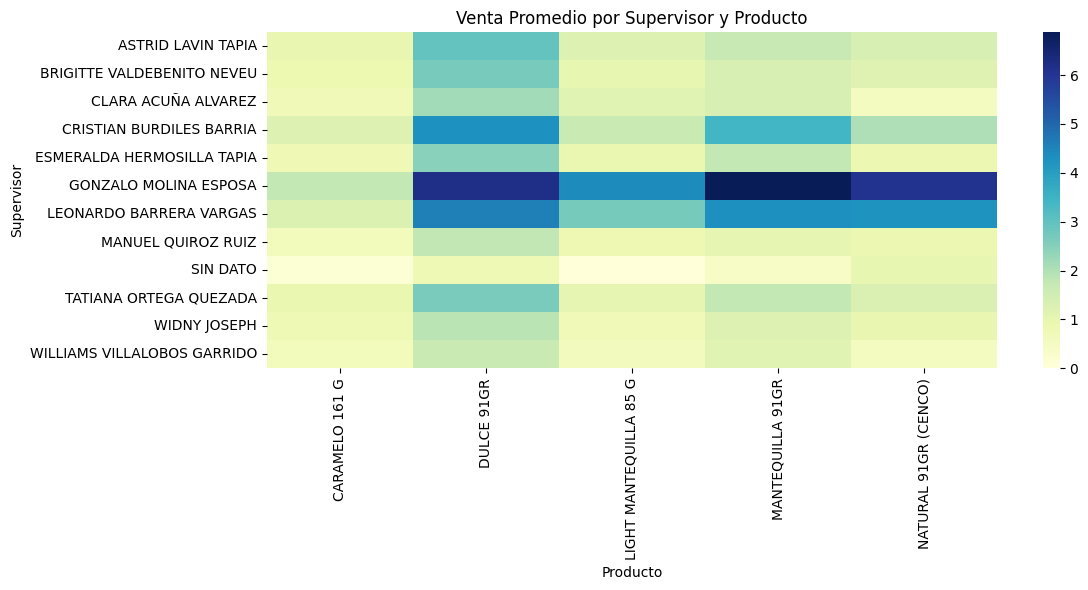

In [46]:
pivot = pd.pivot_table(df, values='Venta', index='Supervisor', columns='Producto', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Venta Promedio por Supervisor y Producto')
plt.tight_layout()
plt.show()


In [48]:
# 📊 Crear resumen por supervisor
ranking = df.groupby('Supervisor').agg({
    'Venta': ['sum', 'mean'],
    'Stock': 'mean',
    'Revisar': 'mean',
    'Valido': 'mean'
}).reset_index()

# Renombrar columnas
ranking.columns = ['Supervisor', 'Venta Total', 'Venta Promedio', 'Stock Promedio', 'Tasa Revisión', 'Tasa Validación']

# Ordenar por ventas totales
ranking = ranking.sort_values('Venta Total', ascending=False)

# Mostrar tabla
ranking.head(10)


Supervisor  Venta Total  Venta Promedio  Stock Promedio  \
3     CRISTIAN BURDILES BARRIA      16018.0        2.679491       77.114252   
5        GONZALO MOLINA ESPOSA      15998.0        5.022920       81.505181   
6      LEONARDO BARRERA VARGAS      13329.0        3.304984       83.806348   
2          CLARA ACUÑA ALVAREZ      10430.0        1.323268       40.921720   
9       TATIANA ORTEGA QUEZADA       9647.0        1.614561       41.478159   
4   ESMERALDA HERMOSILLA TAPIA       8807.0        1.487418       65.038676   
1   BRIGITTE VALDEBENITO NEVEU       7722.0        1.510859       41.716494   
10                WIDNY JOSEPH       7446.0        1.153703       37.187945   
0           ASTRID LAVIN TAPIA       6647.0        1.747371       44.955047   
7           MANUEL QUIROZ RUIZ       6109.0        1.094607       41.594159   

    Tasa Revisión  Tasa Validación  
3        0.702752         0.712769  
5        0.847081         0.853110  
6        0.777934         0.783740  
2        0.727012         0.746149  
9        0.769513         0.779090  
4        0.735759         0.751961  
1        0.769076         0.779446  
10       0.758554         0.773373  
0        0.684143         0.698911  
7        0.724904         0.740194

<ipython-input-49-eec66d257e60>:19: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



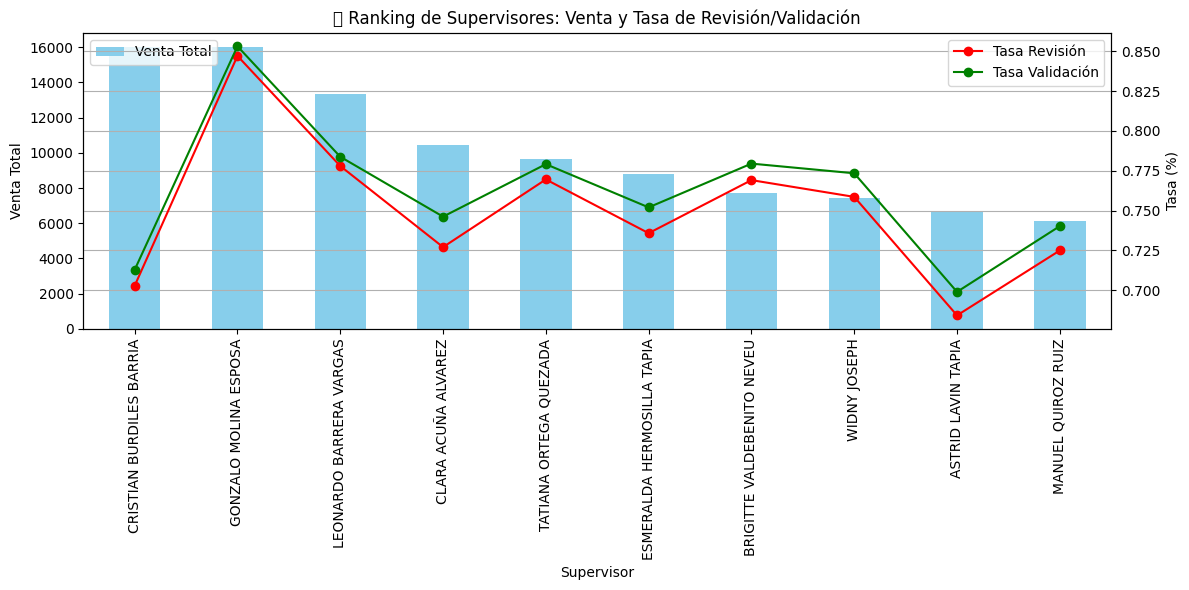

In [49]:
# 🔢 Gráfico combinado de métricas
fig, ax = plt.subplots(figsize=(12,6))

top_n = 10
supervisores_top = ranking.head(top_n)

ax2 = ax.twinx()
supervisores_top.plot(kind='bar', x='Supervisor', y='Venta Total', ax=ax, color='skyblue', label='Venta Total')
supervisores_top.plot(kind='line', x='Supervisor', y='Tasa Revisión', ax=ax2, color='red', marker='o', label='Tasa Revisión')
supervisores_top.plot(kind='line', x='Supervisor', y='Tasa Validación', ax=ax2, color='green', marker='o', label='Tasa Validación')

ax.set_ylabel("Venta Total")
ax2.set_ylabel("Tasa (%)")
ax.set_title("📊 Ranking de Supervisores: Venta y Tasa de Revisión/Validación")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-50-eaaede0efbae>:10: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



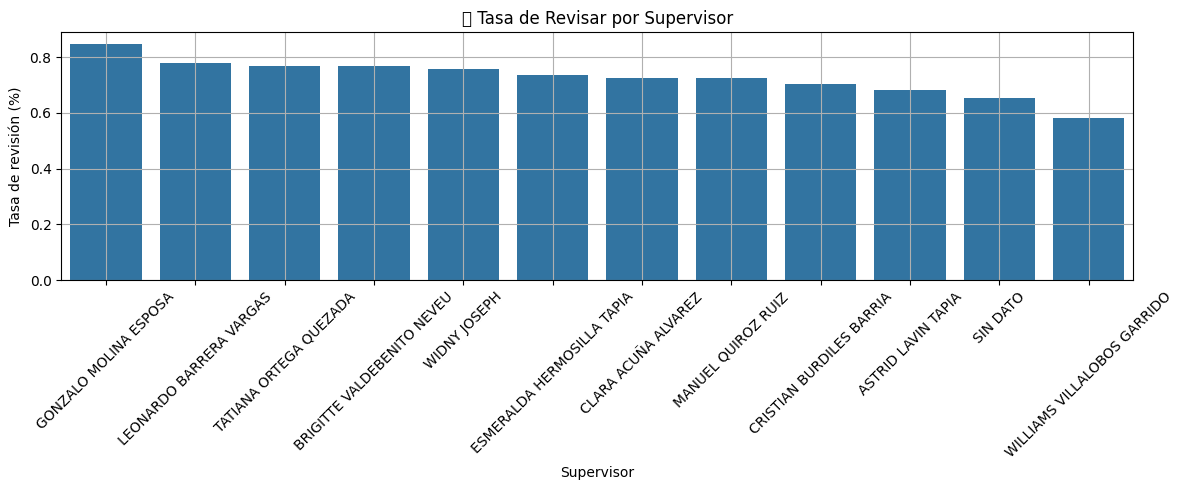

In [50]:
# 🔄 Tasa de revisión por supervisor (orden descendente)
tasa_revision = df.groupby('Supervisor')['Revisar'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=tasa_revision.index, y=tasa_revision.values)
plt.xticks(rotation=45)
plt.ylabel("Tasa de revisión (%)")
plt.title("🔍 Tasa de Revisar por Supervisor")
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
productos_por_sup = df.groupby(['Supervisor', 'Producto']).size().reset_index(name='Cantidad')
producto_top = productos_por_sup.sort_values('Cantidad', ascending=False).groupby('Supervisor').first().reset_index()

# Mostrar top 10 supervisores con su producto más frecuente
producto_top.head(10)


Supervisor                Producto  Cantidad
0          ASTRID LAVIN TAPIA  LIGHT MANTEQUILLA 85 G      1198
1  BRIGITTE VALDEBENITO NEVEU              DULCE 91GR      1373
2         CLARA ACUÑA ALVAREZ              DULCE 91GR      2263
3    CRISTIAN BURDILES BARRIA              DULCE 91GR      1805
4  ESMERALDA HERMOSILLA TAPIA              DULCE 91GR      1644
5       GONZALO MOLINA ESPOSA              DULCE 91GR       766
6     LEONARDO BARRERA VARGAS              DULCE 91GR      1101
7          MANUEL QUIROZ RUIZ  LIGHT MANTEQUILLA 85 G      1632
8                    SIN DATO          CARAMELO 161 G        49
9      TATIANA ORTEGA QUEZADA              DULCE 91GR      1591

In [53]:
cadenas_por_sup = df.groupby(['Supervisor', 'Cadena']).size().reset_index(name='Cantidad')
cadena_top = cadenas_por_sup.sort_values('Cantidad', ascending=False).groupby('Supervisor').first().reset_index()

# Mostrar top 10 supervisores con su cadena más frecuente
cadena_top.head(10)


Supervisor        Cadena  Cantidad
0          ASTRID LAVIN TAPIA  SANTA ISABEL      2190
1  BRIGITTE VALDEBENITO NEVEU  SANTA ISABEL      3840
2         CLARA ACUÑA ALVAREZ  SANTA ISABEL      7629
3    CRISTIAN BURDILES BARRIA  SANTA ISABEL      3902
4  ESMERALDA HERMOSILLA TAPIA  SANTA ISABEL      5298
5       GONZALO MOLINA ESPOSA         JUMBO      1710
6     LEONARDO BARRERA VARGAS  SANTA ISABEL      2190
7          MANUEL QUIROZ RUIZ  SANTA ISABEL      4400
8                    SIN DATO  SANTA ISABEL       245
9      TATIANA ORTEGA QUEZADA  SANTA ISABEL      4866

. Detección de Supervisores Atípicos

<ipython-input-54-129bf4f9478e>:14: UserWarning:

Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.



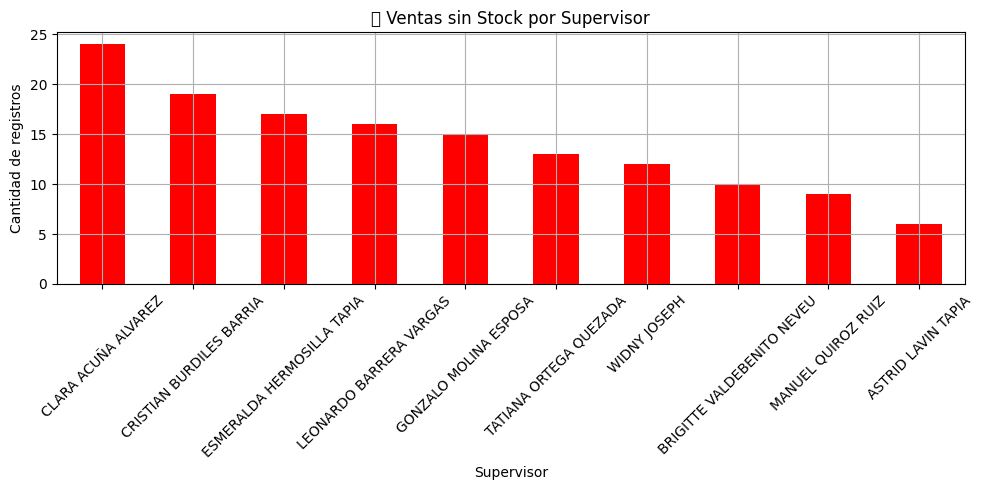

In [54]:
# 🚨 Filtrar casos con venta > 0 pero stock = 0
venta_sin_stock = df[(df['Venta'] > 0) & (df['Stock'] == 0)]

# Contar casos por supervisor
venta_sin_stock_sup = venta_sin_stock['Supervisor'].value_counts().head(10)

# Gráfico
plt.figure(figsize=(10,5))
venta_sin_stock_sup.plot(kind='bar', color='red')
plt.title("❌ Ventas sin Stock por Supervisor")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


muestra la distribución de ventas por supervisor, incluyendo los outliers (valores atípicos).

<ipython-input-55-babf1288653d>:6: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.



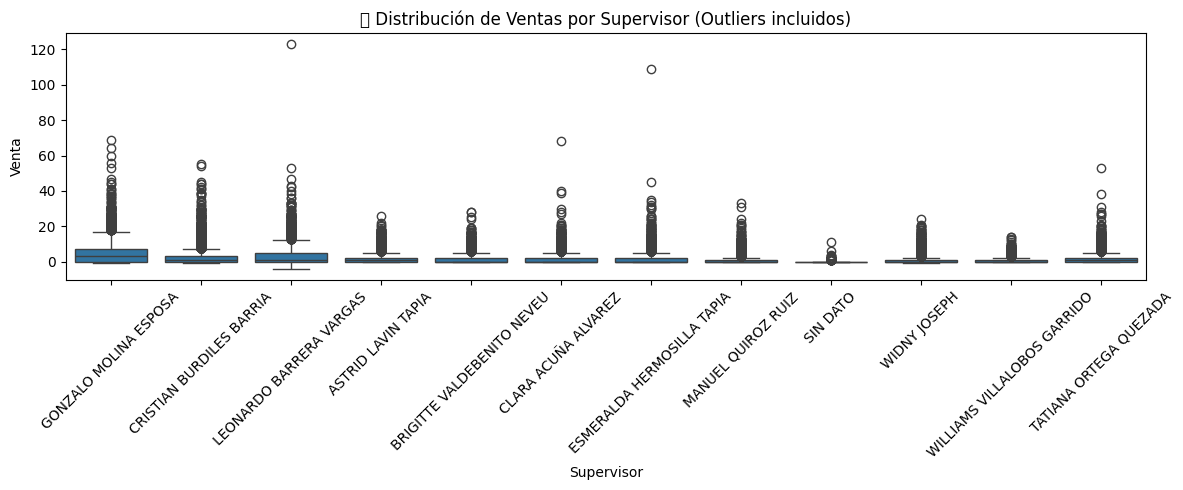

In [55]:
# 💡 Boxplot de venta por supervisor
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Supervisor', y='Venta')
plt.xticks(rotation=45)
plt.title("📦 Distribución de Ventas por Supervisor (Outliers incluidos)")
plt.tight_layout()
plt.show()


Supervisores con más dispersión:

GONZALO MOLINA, LEONARDO BARRERA, y CRISTIAN BURDILES tienen ventas con una amplia dispersión y varios outliers altos.

Supervisores con ventas más bajas y concentradas:

SIN DATO, WILLIAMS VILLALOBOS, y MANUEL QUIROZ muestran valores mucho más bajos, con medianas cercanas a 0.



<ipython-input-56-685ba5457ff4>:6: UserWarning:

Glyph 128178 (\N{HEAVY DOLLAR SIGN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128178 (\N{HEAVY DOLLAR SIGN}) missing from font(s) DejaVu Sans.



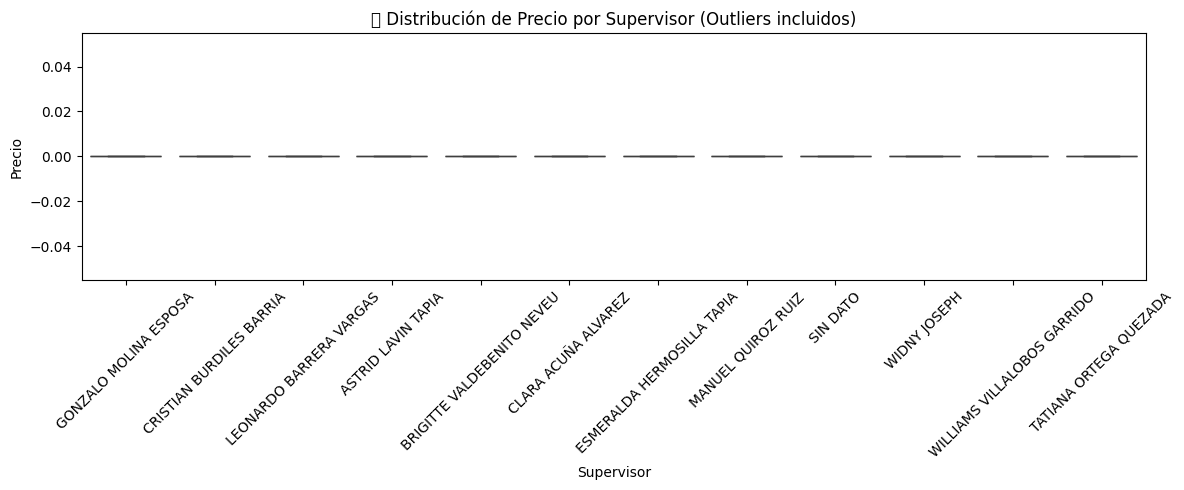

In [56]:
# 💡 Boxplot de precio por supervisor
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Supervisor', y='Precio')
plt.xticks(rotation=45)
plt.title("💲 Distribución de Precio por Supervisor (Outliers incluidos)")
plt.tight_layout()
plt.show()


 Patrones Temporales por Supervisor

¿Qué días trabaja más cada supervisor?

In [59]:
# Convertir fecha a día de la semana
df['Fecha_dt'] = pd.to_datetime(df['Fecha'], errors='coerce')
df['Día_semana'] = df['Fecha_dt'].dt.day_name()

# 🗓️ Frecuencia de registros por día y supervisor
dias_sup = df.groupby(['Supervisor', 'Día_semana']).size().unstack(fill_value=0)

# Mostrar los 5 supervisores con más actividad
dias_sup.head(5)



Día_semana                  Friday  Monday  Saturday  Thursday  Tuesday  \
Supervisor                                                                
ASTRID LAVIN TAPIA            1531     480       534      1292      835   
BRIGITTE VALDEBENITO NEVEU    1773     684       154      1498     1126   
CLARA ACUÑA ALVAREZ           3199    1423       632      1839     1530   
CRISTIAN BURDILES BARRIA      1765    1452       528      1541     1615   
ESMERALDA HERMOSILLA TAPIA    1397    1583       324      1554     1414   

Día_semana                  Wednesday  
Supervisor                             
ASTRID LAVIN TAPIA                745  
BRIGITTE VALDEBENITO NEVEU       1226  
CLARA ACUÑA ALVAREZ              1828  
CRISTIAN BURDILES BARRIA         1385  
ESMERALDA HERMOSILLA TAPIA       1505

 heatmap de actividad semanal por supervisor, y permite identificar patrones temporales en su desempeño.

<ipython-input-60-affe573f5918>:6: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.



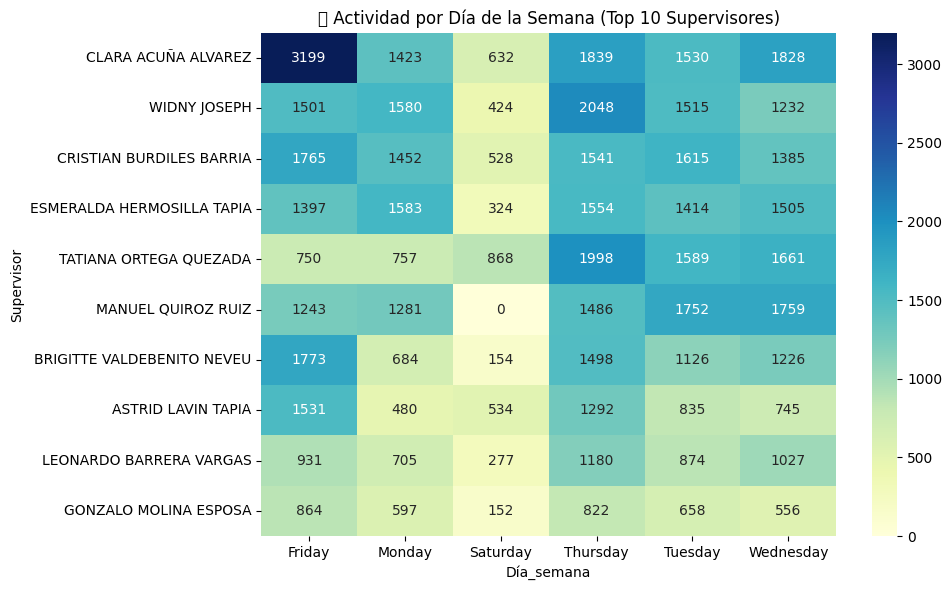

In [60]:
# 📊 Heatmap de días más activos por supervisor (top 10)
top_sup = df['Supervisor'].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.heatmap(dias_sup.loc[top_sup], cmap='YlGnBu', annot=True, fmt='d')
plt.title("📅 Actividad por Día de la Semana (Top 10 Supervisores)")
plt.tight_layout()
plt.show()


Supervisores más activos:
CLARA ACUÑA ALVAREZ:

Altísima actividad los viernes (3.199 registros).

Actividad fuerte y constante de lunes a jueves.

TATIANA ORTEGA QUEZADA:

Mucha actividad jueves y martes.

MANUEL QUIROZ RUIZ:

Cero registros el sábado (posible ausencia o patrón de descanso).

Qué patrones podemos observar?
📅 Días más activos en general:

Jueves y viernes suelen tener más actividad.

Sábados tienden a tener menor carga, como era esperable.

🧑‍💼 Supervisores que no trabajan todos los días:

Algunos como GONZALO MOLINA y BRIGITTE VALDEBENITO tienen pocos o nulos registros los sábados.

En qué días se marcan más errores

<ipython-input-62-af8bf84ca177>:11: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



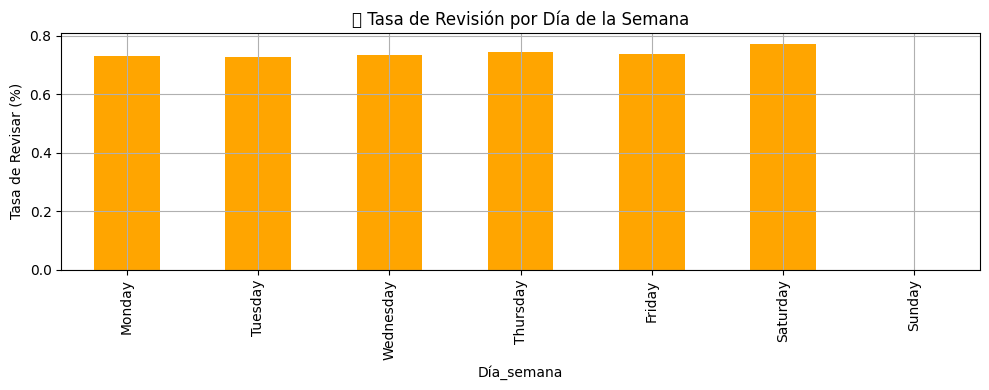

In [62]:
# 🔄 Promedio de revisión por día de la semana
rev_dia = df.groupby('Día_semana')['Revisar'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10,4))
rev_dia.plot(kind='bar', color='orange')
plt.title("📌 Tasa de Revisión por Día de la Semana")
plt.ylabel("Tasa de Revisar (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


Observaciones clave:
 Mayor tasa de revisión el día sábado:

La tasa sube levemente a ~0.77, lo que puede indicar:

Más registros con errores el sábado

Mayor atención del personal en detectar problemas

Cambios en el comportamiento del consumidor o flujo de trabajo

Lunes a viernes muy parejos (~0.73–0.74):

Indica consistencia en las prácticas de revisión
 Falta de datos en domingo:

El domingo no tiene barra → Puede que:

No se trabaje ese día

No se hayan registrado datos

Todos los valores ese día sean nulos o faltantes

. Asociación con cadena o producto

In [64]:
pd.crosstab(df['Supervisor'], df['Cadena'])


Cadena                       HIPER LIDER  JUMBO  LIDER EXPRESS  SANTA ISABEL  \
Supervisor                                                                     
ASTRID LAVIN TAPIA                  1893    974            360          2190   
BRIGITTE VALDEBENITO NEVEU          1076   1455              0          3840   
CLARA ACUÑA ALVAREZ                 1634    734            184          7629   
CRISTIAN BURDILES BARRIA            2566   1450            368          3902   
ESMERALDA HERMOSILLA TAPIA          1552    735            192          5298   
GONZALO MOLINA ESPOSA                356   1710            368          1215   
LEONARDO BARRERA VARGAS             1124   1220            368          2190   
MANUEL QUIROZ RUIZ                  1486   1459              0          4400   
SIN DATO                               0      0              0           245   
TATIANA ORTEGA QUEZADA              1124   1445            188          4866   
WIDNY JOSEPH                        1497   1710              0          5093   
WILLIAMS VILLALOBOS GARRIDO          376    725            564           974   

Cadena                       UNIMARC  
Supervisor                            
ASTRID LAVIN TAPIA                 0  
BRIGITTE VALDEBENITO NEVEU        90  
CLARA ACUÑA ALVAREZ              270  
CRISTIAN BURDILES BARRIA           0  
ESMERALDA HERMOSILLA TAPIA         0  
GONZALO MOLINA ESPOSA              0  
LEONARDO BARRERA VARGAS           92  
MANUEL QUIROZ RUIZ               176  
SIN DATO                           0  
TATIANA ORTEGA QUEZADA             0  
WIDNY JOSEPH                       0  
WILLIAMS VILLALOBOS GARRIDO        0

¿Qué cadenas gestionan más cada supervisor?

<ipython-input-67-1d061d5a86b4>:6: UserWarning:

Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) DejaVu Sans.



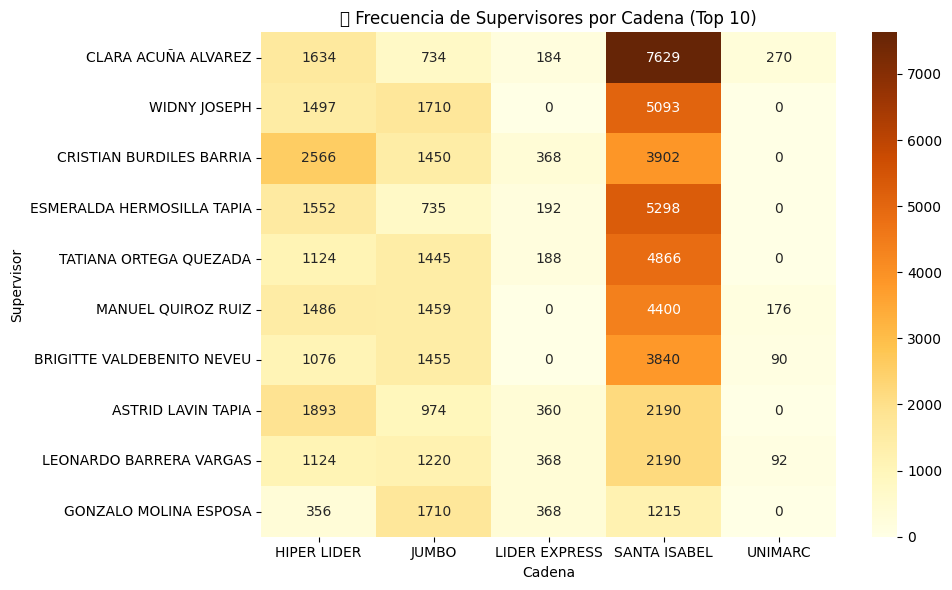

In [67]:
# 🔥 Heatmap: Supervisores vs Cadenas (Top 10 supervisores)
top_sup_cadena = df['Supervisor'].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.heatmap(tabla_cadena.loc[top_sup_cadena], cmap='YlOrBr', annot=True, fmt='d')
plt.title("🏬 Frecuencia de Supervisores por Cadena (Top 10)")
plt.tight_layout()
plt.show()


Colores más oscuros = más registros
Por ejemplo, CLARA ACUÑA ALVAREZ tiene más de 7.600 registros en SANTA ISABEL, lo que indica una fuerte asignación a esa cadena.

 Supervisores con más diversidad de cadenas:
CRISTIAN BURDILES, ESMERALDA HERMOSILLA, WIDNY JOSEPH → aparecen en varias cadenas, aunque a diferentes niveles.

GONZALO MOLINA está mucho en JUMBO y algo en LIDER EXPRESS, pero nada en UNIMARC ni SANTA ISABEL.

¿Qué productos registra más cada supervisor?

In [68]:
# 📊 Tabla Supervisor vs Producto
tabla_producto = pd.crosstab(df['Supervisor'], df['Producto'])

# Mostrar
tabla_producto.head(10)


Producto                    CARAMELO 161 G  DULCE 91GR  \
Supervisor                                               
ASTRID LAVIN TAPIA                    1198        1195   
BRIGITTE VALDEBENITO NEVEU            1328        1373   
CLARA ACUÑA ALVAREZ                   2129        2263   
CRISTIAN BURDILES BARRIA              1804        1805   
ESMERALDA HERMOSILLA TAPIA            1643        1644   
GONZALO MOLINA ESPOSA                  766         766   
LEONARDO BARRERA VARGAS               1055        1101   
MANUEL QUIROZ RUIZ                    1543        1632   
SIN DATO                                49          49   
TATIANA ORTEGA QUEZADA                1591        1591   

Producto                    LIGHT MANTEQUILLA 85 G  MANTEQUILLA 91GR  \
Supervisor                                                             
ASTRID LAVIN TAPIA                            1198              1198   
BRIGITTE VALDEBENITO NEVEU                    1373              1328   
CLARA ACUÑA ALVAREZ                           2262              2127   
CRISTIAN BURDILES BARRIA                      1804              1804   
ESMERALDA HERMOSILLA TAPIA                    1643              1641   
GONZALO MOLINA ESPOSA                          766               766   
LEONARDO BARRERA VARGAS                       1101              1055   
MANUEL QUIROZ RUIZ                            1632              1543   
SIN DATO                                        49                49   
TATIANA ORTEGA QUEZADA                        1590              1591   

Producto                    NATURAL 91GR (CENCO)  
Supervisor                                        
ASTRID LAVIN TAPIA                           628  
BRIGITTE VALDEBENITO NEVEU                  1059  
CLARA ACUÑA ALVAREZ                         1670  
CRISTIAN BURDILES BARRIA                    1069  
ESMERALDA HERMOSILLA TAPIA                  1206  
GONZALO MOLINA ESPOSA                        585  
LEONARDO BARRERA VARGAS                      682  
MANUEL QUIROZ RUIZ                          1171  
SIN DATO                                      49  
TATIANA ORTEGA QUEZADA                      1260

<ipython-input-69-4f97ce8a7f53>:8: UserWarning:

Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.



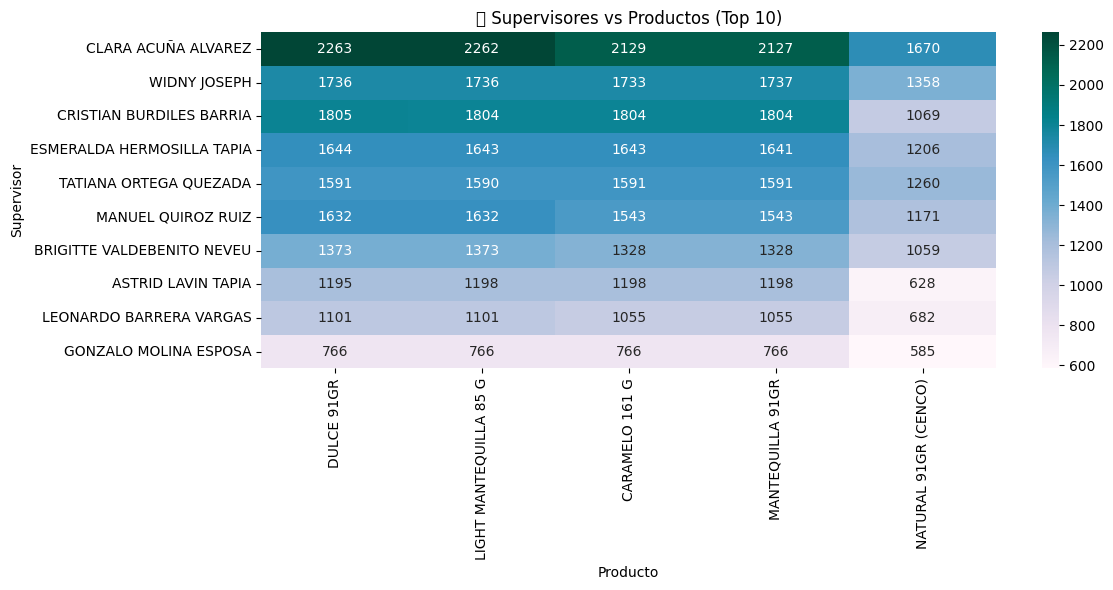

In [69]:
# 🔥 Heatmap: Supervisores vs Productos (Top 10 supervisores y productos más frecuentes)
top_sup_prod = df['Supervisor'].value_counts().head(10).index
top_prod = df['Producto'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.heatmap(tabla_producto.loc[top_sup_prod, top_prod], cmap='PuBuGn', annot=True, fmt='d')
plt.title("🛒 Supervisores vs Productos (Top 10)")
plt.tight_layout()
plt.show()


 Supervisores con más diversidad de productos o cadenas

In [70]:
# ¿Cuántos productos distintos maneja cada supervisor?
productos_distintos = df.groupby('Supervisor')['Producto'].nunique().sort_values(ascending=False)

# ¿Cuántas cadenas distintas maneja cada supervisor?
cadenas_distintas = df.groupby('Supervisor')['Cadena'].nunique().sort_values(ascending=False)

# Mostrar combinadas
diversidad = pd.DataFrame({
    'Productos únicos': productos_distintos,
    'Cadenas únicas': cadenas_distintas
}).sort_values('Productos únicos', ascending=False)

diversidad.head(10)


Productos únicos  Cadenas únicas
Supervisor                                                  
ASTRID LAVIN TAPIA                         5               4
BRIGITTE VALDEBENITO NEVEU                 5               4
CLARA ACUÑA ALVAREZ                        5               5
CRISTIAN BURDILES BARRIA                   5               4
ESMERALDA HERMOSILLA TAPIA                 5               4
GONZALO MOLINA ESPOSA                      5               4
LEONARDO BARRERA VARGAS                    5               5
MANUEL QUIROZ RUIZ                         5               4
SIN DATO                                   5               1
TATIANA ORTEGA QUEZADA                     5               4

Clúster de Supervisores con KMeans

In [72]:
# Agrupar y calcular métricas promedio por supervisor
sup_cluster_data = df.groupby('Supervisor').agg({
    'Venta': 'mean',
    'Stock': 'mean',
    'Revisar': 'mean',
    'Valido': 'mean'
}).dropna()

# Renombrar para claridad
sup_cluster_data.columns = ['Venta_prom', 'Stock_prom', 'Tasa_Revisar', 'Tasa_Valido']


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Escalar datos
scaler = StandardScaler()
sup_scaled = scaler.fit_transform(sup_cluster_data)

# Aplicar KMeans (3 clústers como ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
sup_cluster_data['Cluster'] = kmeans.fit_predict(sup_scaled)


<ipython-input-74-bcd11c791d5c>:8: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.



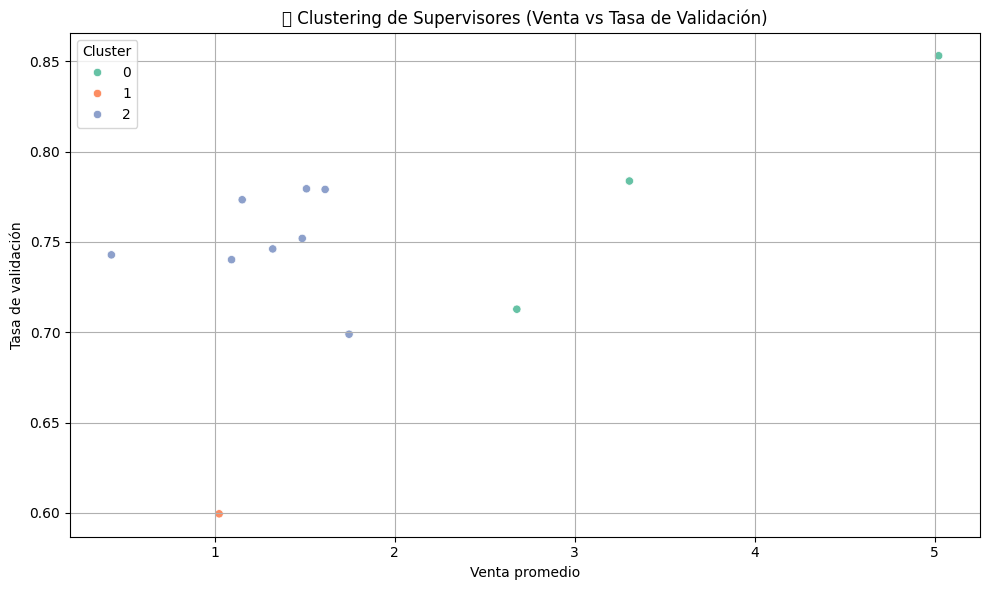

In [74]:
# 🧊 Visualización básica de clústeres
plt.figure(figsize=(10,6))
sns.scatterplot(data=sup_cluster_data, x='Venta_prom', y='Tasa_Valido', hue='Cluster', palette='Set2')
plt.title("🧠 Clustering de Supervisores (Venta vs Tasa de Validación)")
plt.xlabel("Venta promedio")
plt.ylabel("Tasa de validación")
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
# Mostrar métricas promedio por clúster
sup_cluster_data.groupby('Cluster').mean().round(2)


Venta_prom  Stock_prom  Tasa_Revisar  Tasa_Valido
Cluster                                                   
0              3.67       80.81          0.78         0.78
1              1.03       38.05          0.58         0.60
2              1.29       41.83          0.73         0.75

prediccion del desempeño

 ¿Será revisado (Revisar = 1)?

 ¿Será no válido (Valido = 0)?

 ¿Tendrá baja venta?

In [76]:
# Variables para predecir: Supervisor, Producto, Cadena, Hora, Precio, Stock
df_pred = df[['Supervisor', 'Producto', 'Cadena', 'Hora', 'Precio', 'Stock', 'Venta', 'Valido', 'Revisar']].dropna()

# Procesar hora a formato numérico
df_pred['Hora_dt'] = pd.to_datetime(df_pred['Hora'], errors='coerce')
df_pred['Hora_num'] = df_pred['Hora_dt'].dt.hour
df_pred = df_pred.drop(columns='Hora')

# Generar variable binaria para "baja venta" (ejemplo: bajo el percentil 25)
p25 = df_pred['Venta'].quantile(0.25)
df_pred['Baja_Venta'] = (df_pred['Venta'] < p25).astype(int)

# Variables independientes
X = pd.get_dummies(df_pred[['Supervisor', 'Producto', 'Cadena', 'Hora_num', 'Precio', 'Stock']], drop_first=True)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear función de entrenamiento y reporte
def entrenar_y_evaluar(y, etiqueta):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    modelo = RandomForestClassifier(n_estimators=100, random_state=42)
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    print(f"🎯 Clasificación para {etiqueta}")
    print(classification_report(y_test, pred))


In [78]:
# 1. Predicción de Revisión
entrenar_y_evaluar(df_pred['Revisar'], 'Revisión (Revisar = 1)')

# 2. Predicción de Validación
entrenar_y_evaluar(1 - df_pred['Valido'], 'No válido (Valido = 0)')

# 3. Predicción de Baja Venta
entrenar_y_evaluar(df_pred['Baja_Venta'], 'Baja venta')


🎯 Clasificación para Revisión (Revisar = 1)
              precision    recall  f1-score   support

           0       0.53      0.35      0.42       732
           1       0.97      0.99      0.98     15982

    accuracy                           0.96     16714
   macro avg       0.75      0.67      0.70     16714
weighted avg       0.95      0.96      0.95     16714

🎯 Clasificación para No válido (Valido = 0)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     16274
           1       0.06      0.02      0.03       440

    accuracy                           0.97     16714
   macro avg       0.52      0.51      0.51     16714
weighted avg       0.95      0.97      0.96     16714

🎯 Clasificación para Baja venta
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16714
           1       0.00      0.00      0.00         0

    accuracy                           1.00     16714
   macro

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Prever con antelación si un registro tiene alta probabilidad de revisión o error

Detectar qué supervisores, productos o cadenas tienden a fallar

Aplicar recomendaciones automatizadas o alertas internas

In [35]:
# Convertir fecha
df['Fecha_dt'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Crear columna de semana (o puedes usar Semana_Activa si está)
df['Semana'] = df['Fecha_dt'].dt.to_period('W').astype(str)


In [38]:
# Agrupar por Supervisor y Semana
df2=df.copy()
df2=df2[(df2['Revisar']==1)&(df2['Valido']==1)]
trend = df2.groupby(['Supervisor', 'Semana']).agg({
    'Venta': 'mean',
    'Revisar': 'mean',
    'Valido': 'mean',
    "Disponibilidad": 'mean'

}).reset_index()

trend.rename(columns={
    'Venta': 'Venta_prom',
    'Revisar': 'Tasa_Revisar',
    'Valido': 'Tasa_Valido'
}, inplace=True)


analisis de cada supervisor

<ipython-input-39-753bfc8c9d79>:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


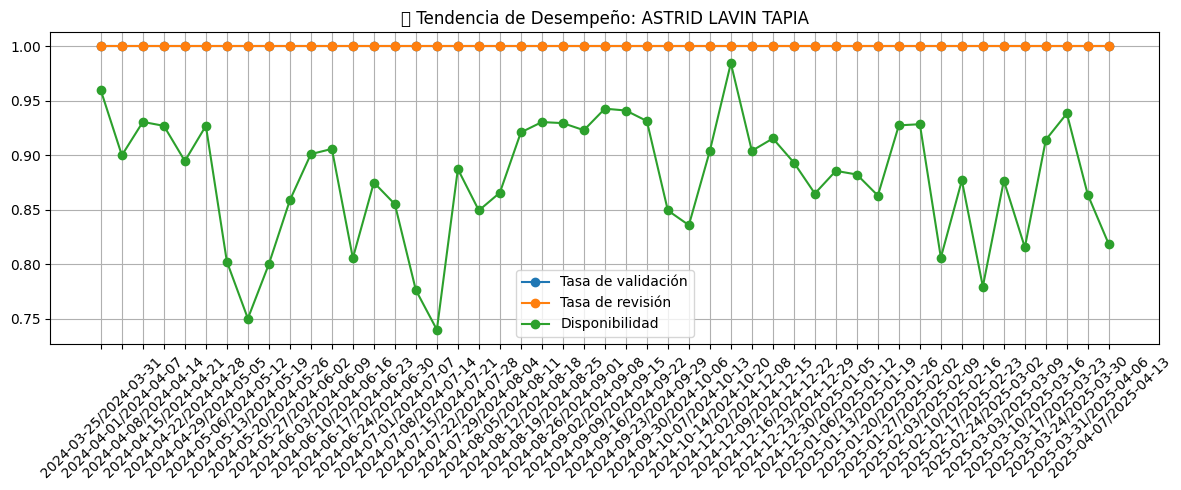

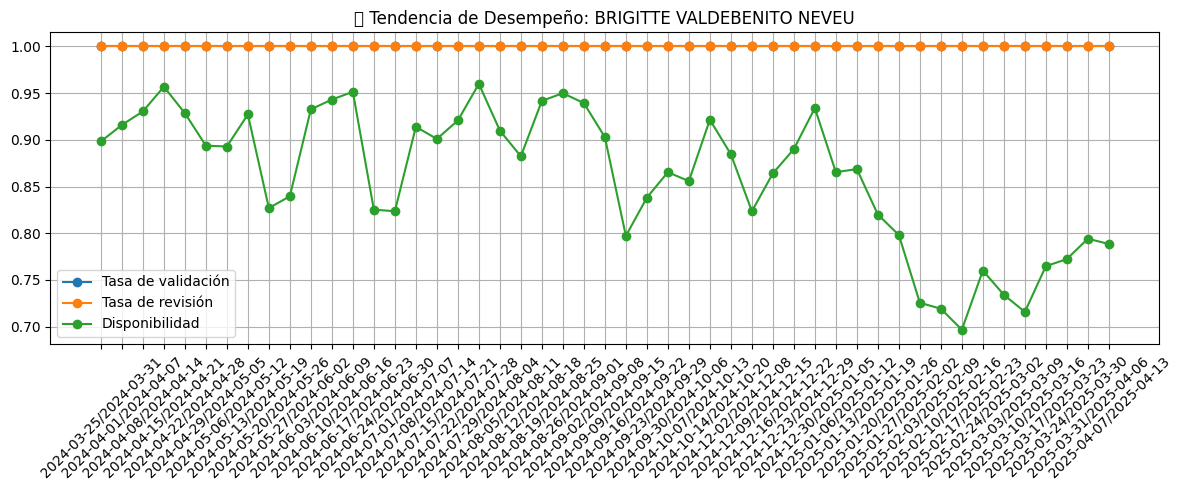

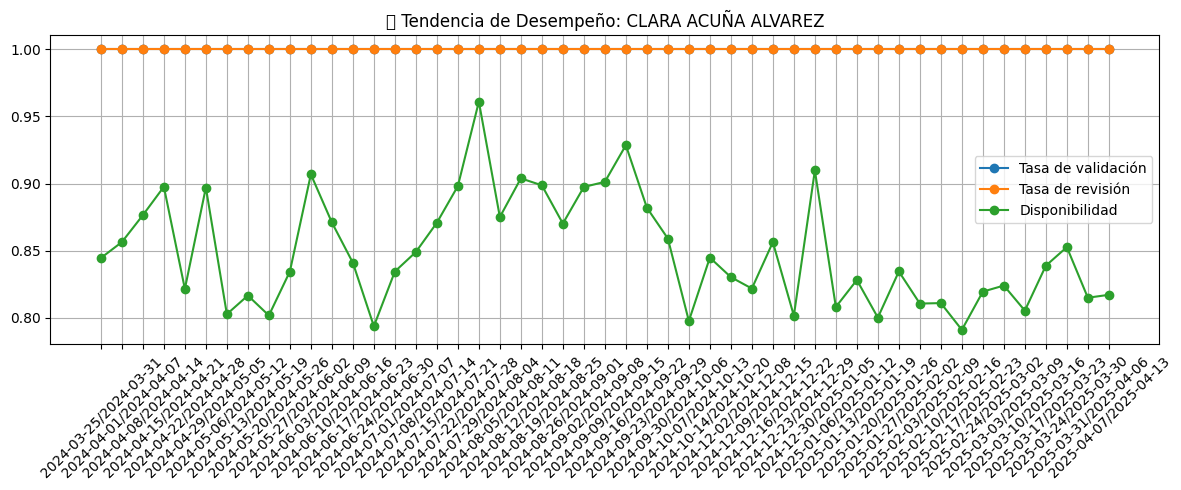

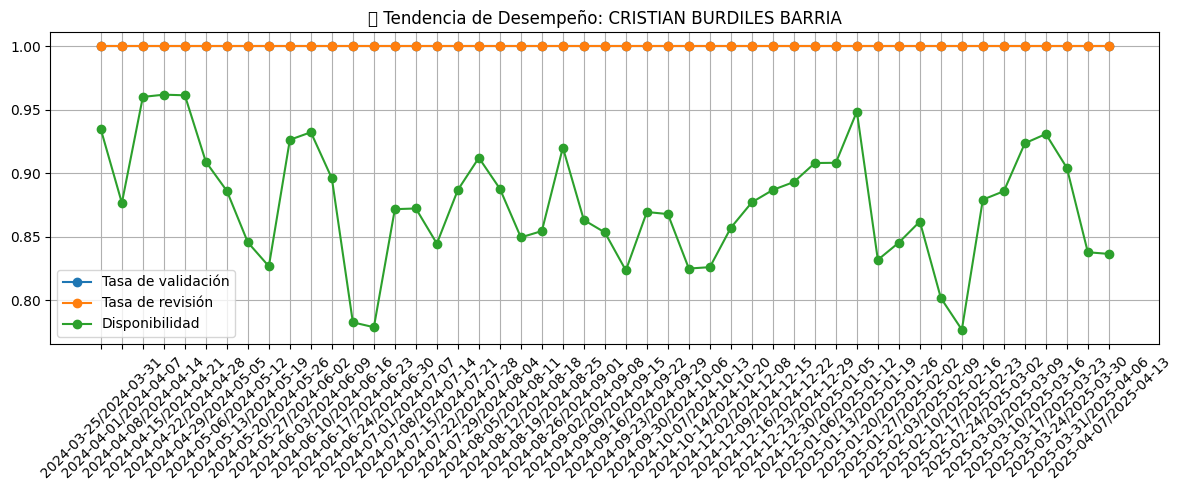

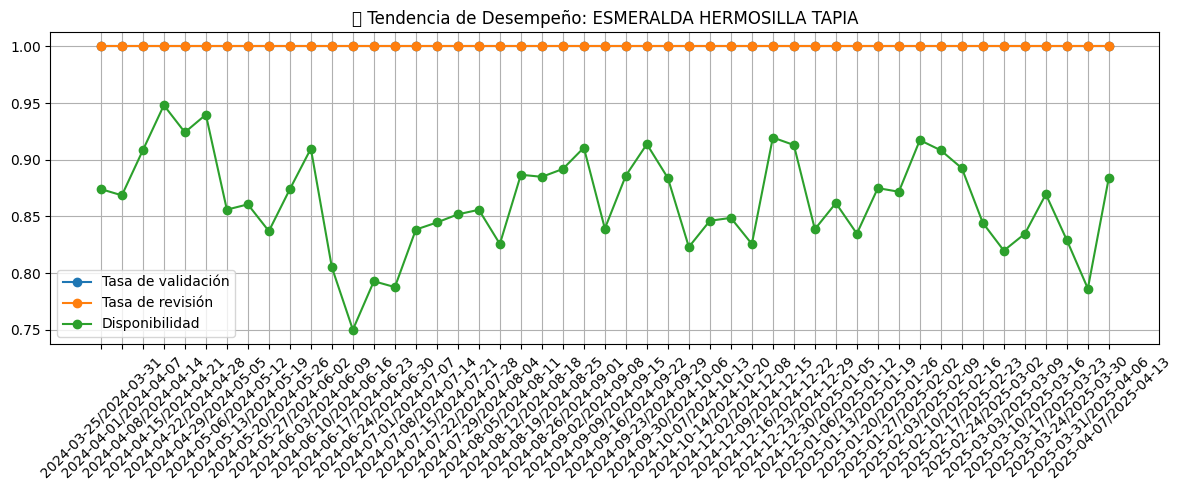

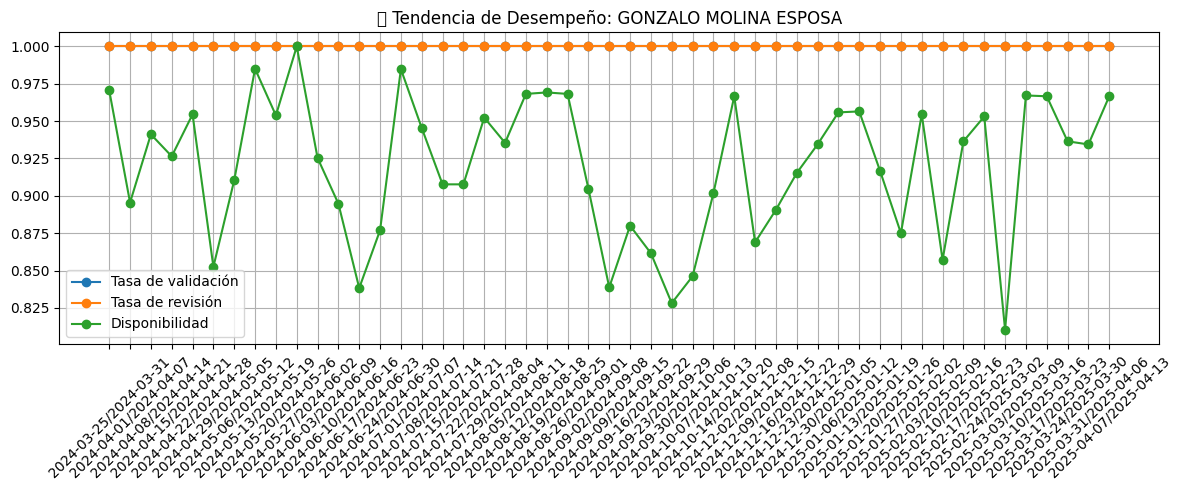

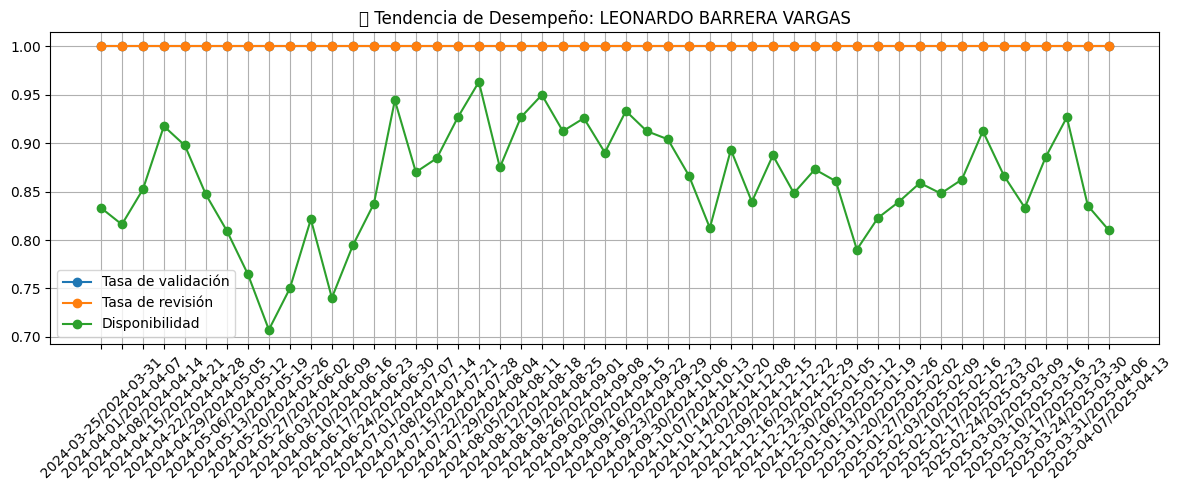

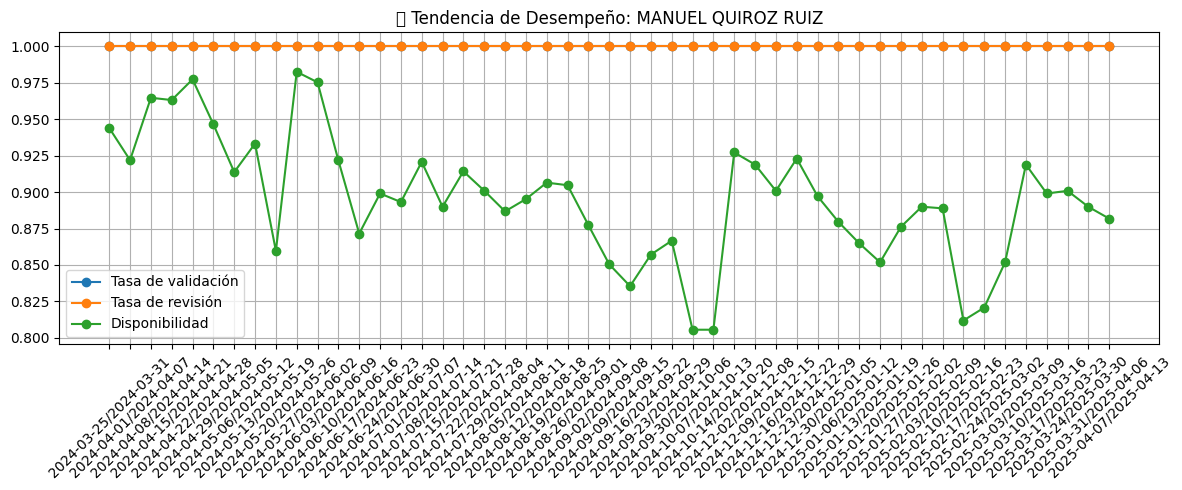

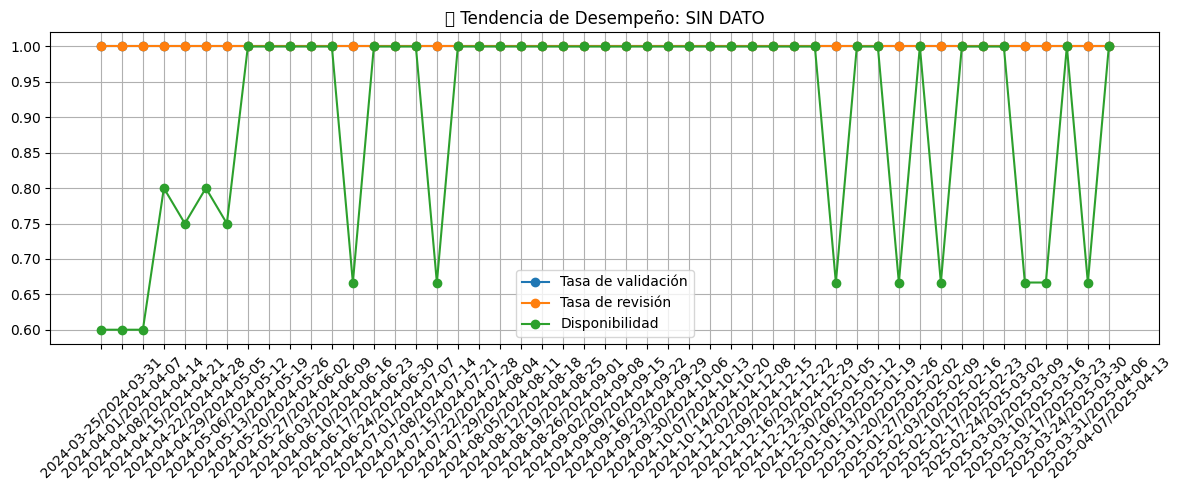

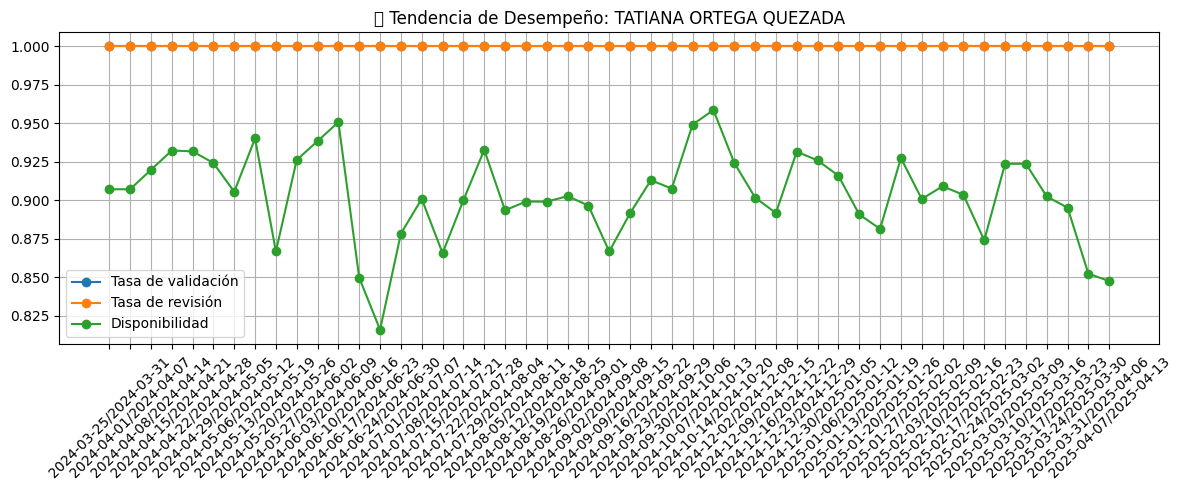

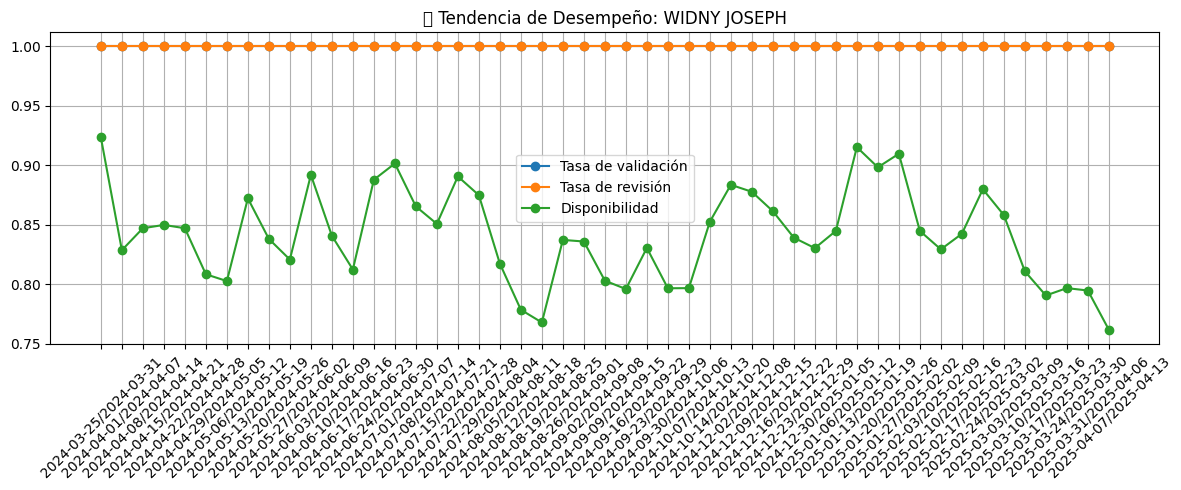

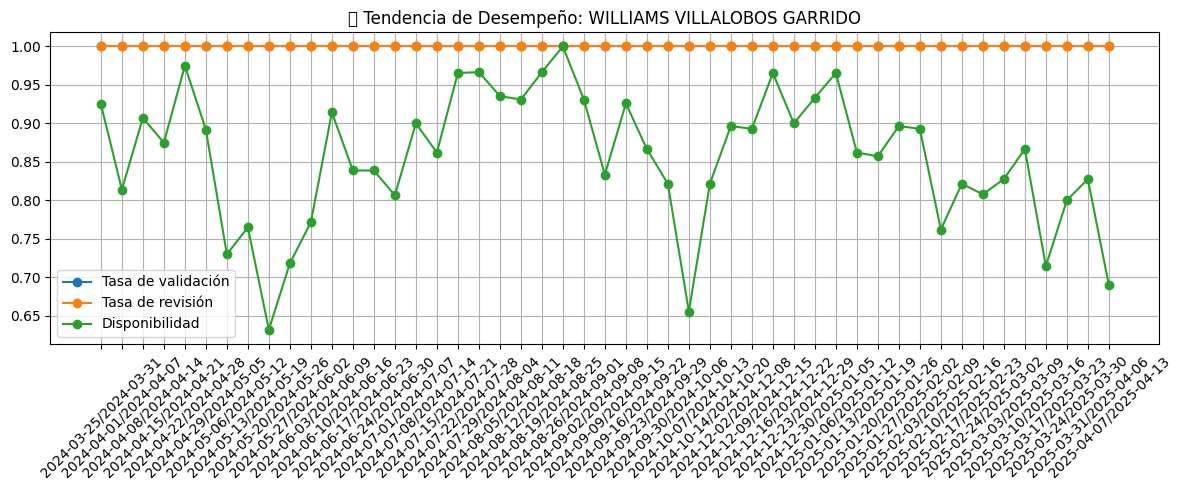

In [39]:
# Mostrar tendencia para todos los supervisores (uno por uno)
supervisores_unicos = trend['Supervisor'].unique()

for supervisor in supervisores_unicos:
    sup_trend = trend[trend['Supervisor'] == supervisor]

    plt.figure(figsize=(12,5))

#    plt.plot(sup_trend['Semana'], sup_trend['Venta_prom'], marker='o', label='Venta promedio')
    plt.plot(sup_trend['Semana'], sup_trend['Tasa_Valido'], marker='o', label='Tasa de validación')
    plt.plot(sup_trend['Semana'], sup_trend['Tasa_Revisar'], marker='o', label='Tasa de revisión')
    plt.plot(sup_trend['Semana'], sup_trend['Disponibilidad'], marker='o', label='Disponibilidad')

    plt.title(f"📈 Tendencia de Desempeño: {supervisor}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Análisis Exploratorio Visual de Revisar y Valido

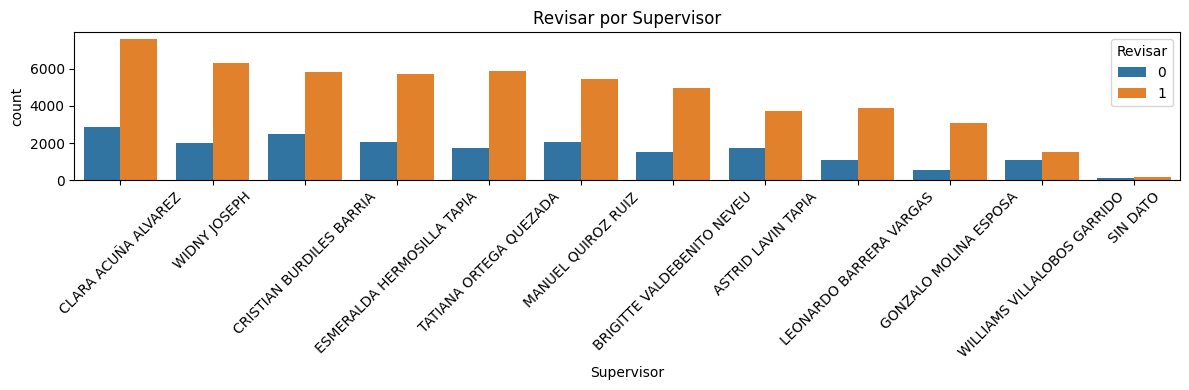

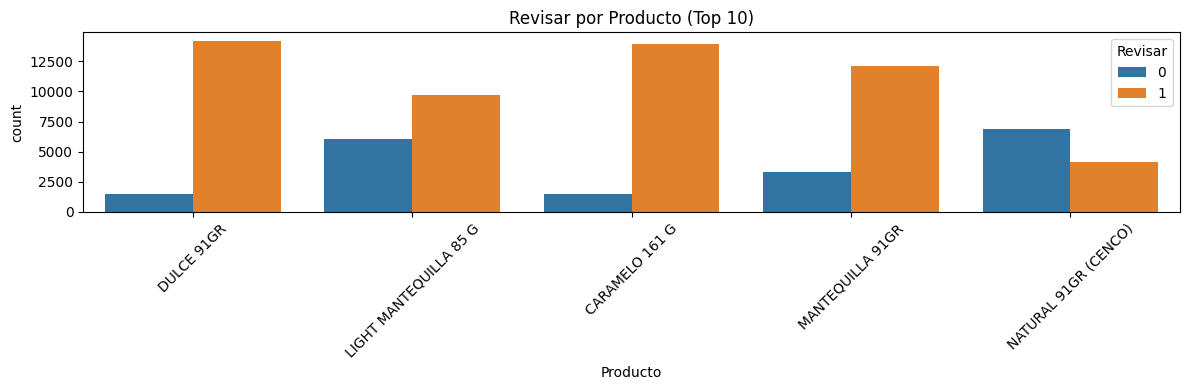

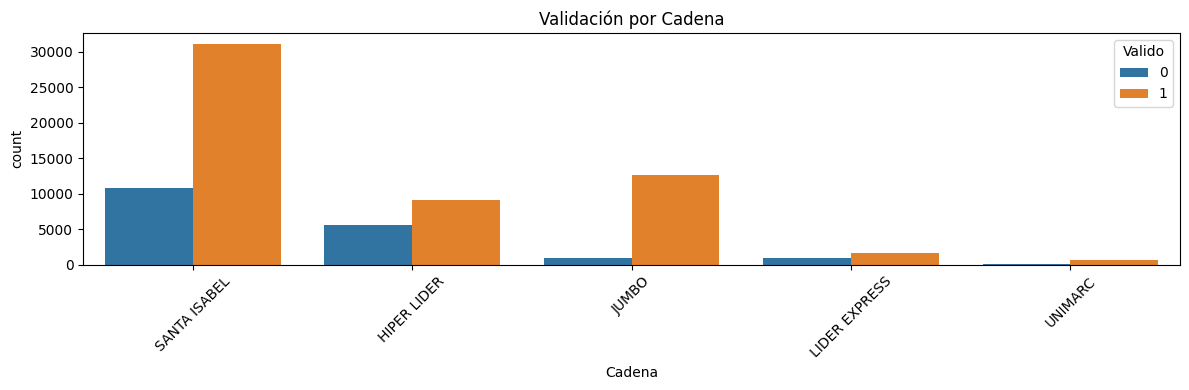

In [99]:
# Asegúrate de tener estas librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Si no lo tienes cargado, carga tu DataFrame:
# df = pd.read_excel("tu_archivo.xlsx")

# 🔄 Revisar por Supervisor
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Supervisor', hue='Revisar', order=df['Supervisor'].value_counts().index)
plt.title('Revisar por Supervisor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔄 Revisar por Producto
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Producto', hue='Revisar', order=df['Producto'].value_counts().index[:10])
plt.title('Revisar por Producto (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ Valido por Cadena
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Cadena', hue='Valido', order=df['Cadena'].value_counts().index)
plt.title('Validación por Cadena')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [100]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Preparar DataFrame
df_tree = df[['Supervisor', 'Producto', 'Cadena', 'Hora', 'Precio', 'Stock', 'Revisar', 'Valido']].dropna()

# Procesar hora
df_tree['Hora_dt'] = pd.to_datetime(df_tree['Hora'], errors='coerce')
df_tree['Hora_num'] = df_tree['Hora_dt'].dt.hour
df_tree = df_tree.drop(columns=['Hora', 'Hora_dt'])

# Variables predictoras
X = pd.get_dummies(df_tree[['Supervisor', 'Producto', 'Cadena', 'Hora_num', 'Precio', 'Stock']], drop_first=True)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.



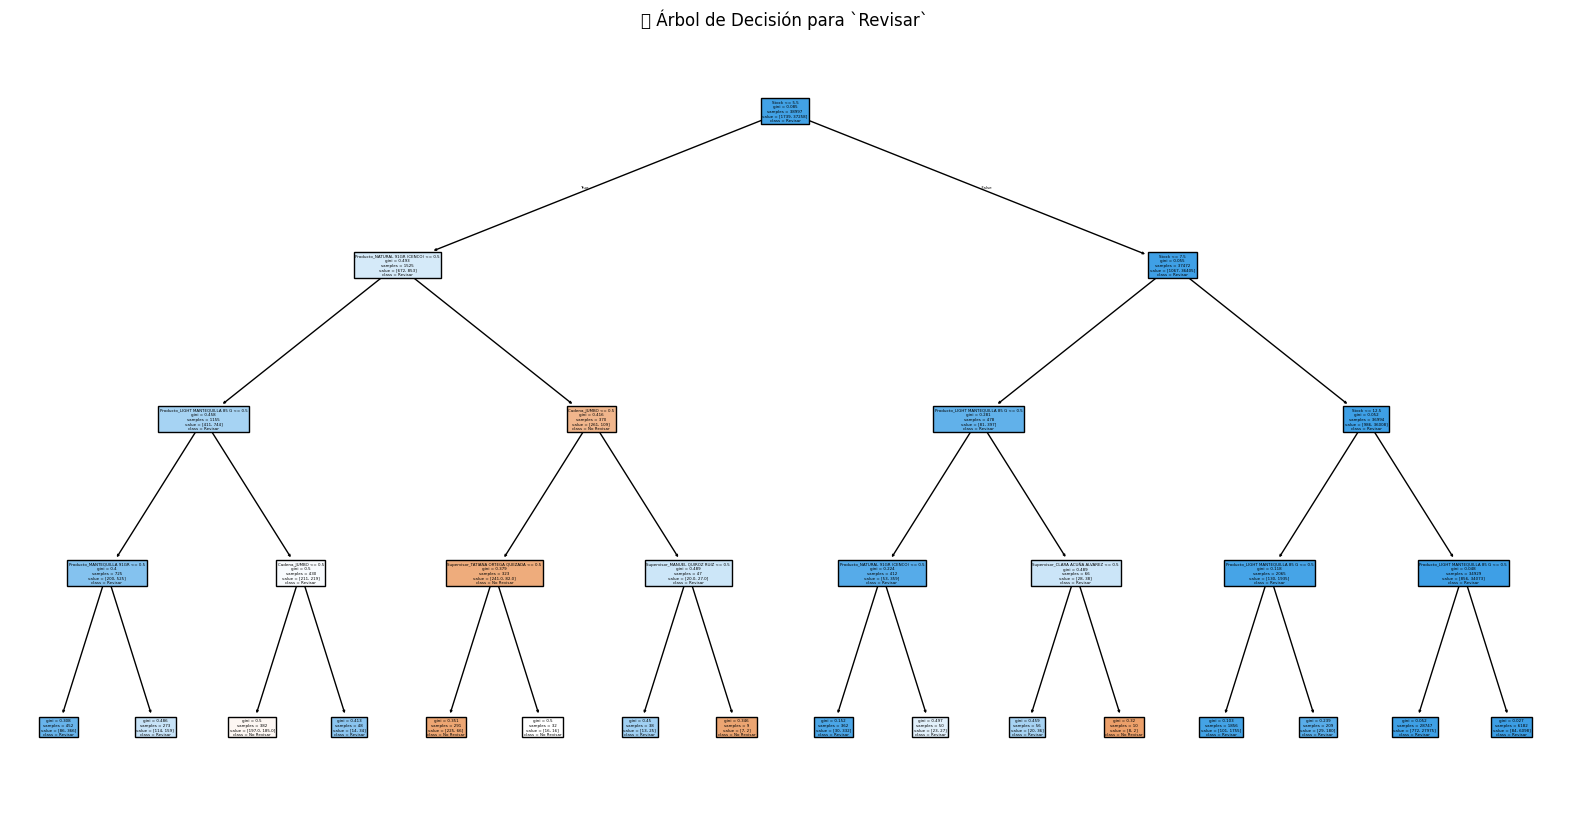

In [101]:
# Objetivo: Revisar
y_rev = df_tree['Revisar']
X_train, X_test, y_train, y_test = train_test_split(X, y_rev, test_size=0.3, random_state=42)

# Entrenar árbol
modelo_rev = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_rev.fit(X_train, y_train)

# Visualizar
plt.figure(figsize=(20,10))
plot_tree(modelo_rev, feature_names=X.columns, class_names=['No Revisar', 'Revisar'], filled=True)
plt.title("🌳 Árbol de Decisión para `Revisar`")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.



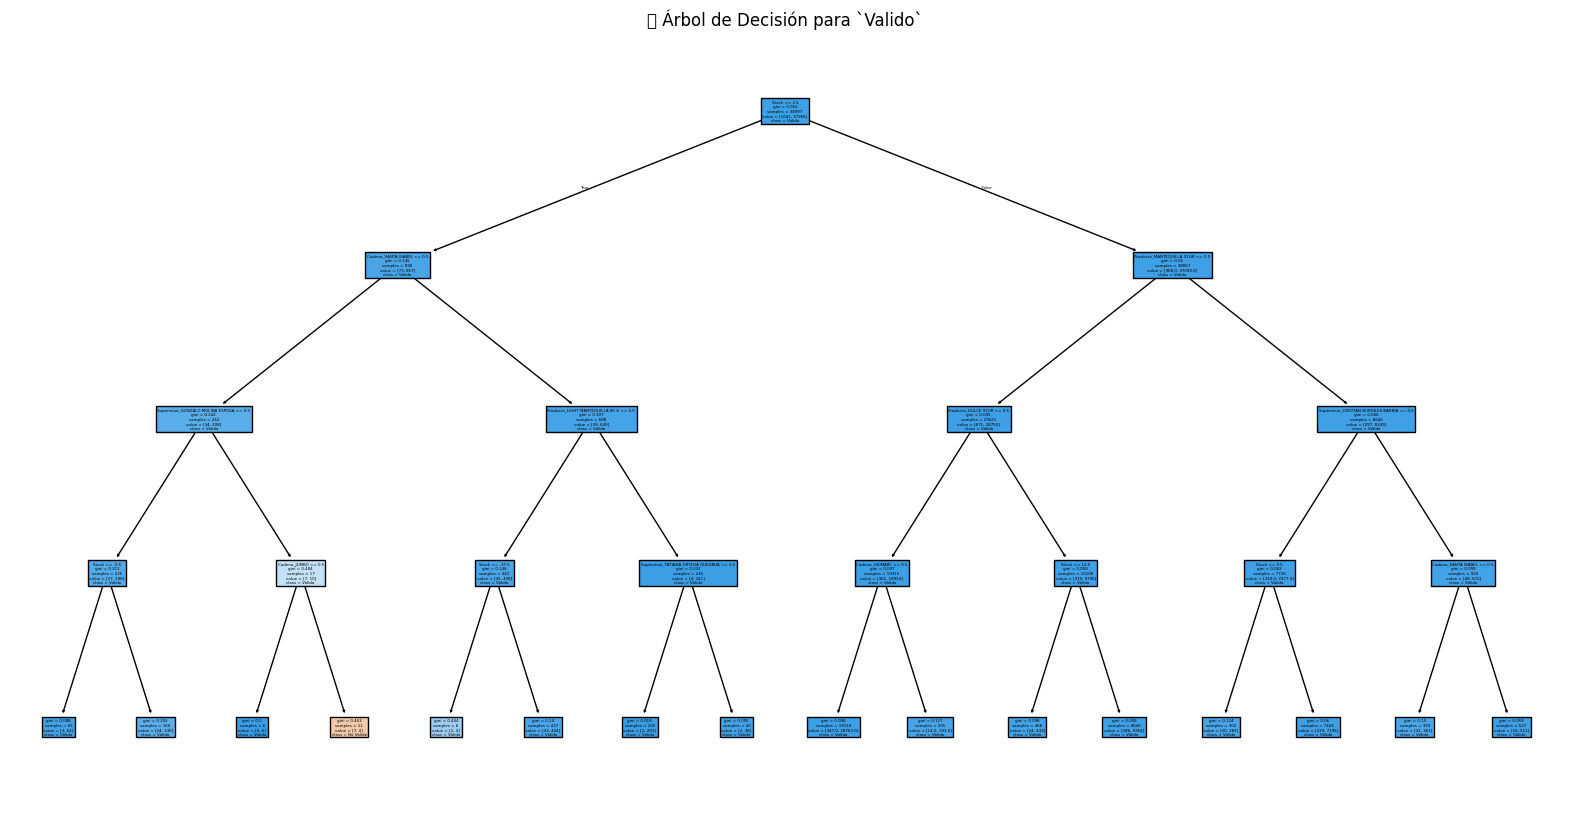

In [102]:
# Objetivo: Valido
y_val = df_tree['Valido']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_val, test_size=0.3, random_state=42)

# Entrenar árbol
modelo_val = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_val.fit(X_train2, y_train2)

# Visualizar
plt.figure(figsize=(20,10))
plot_tree(modelo_val, feature_names=X.columns, class_names=['No Válido', 'Válido'], filled=True)
plt.title("🌳 Árbol de Decisión para `Valido`")
plt.show()


lenguaje no suervisado Clustering con KMeans

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar variables numéricas
df_cluster = df[['Precio', 'Stock', 'Revisar', 'Valido']].dropna()

# Escalar los datos
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster)

# Entrenar modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_cluster)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.



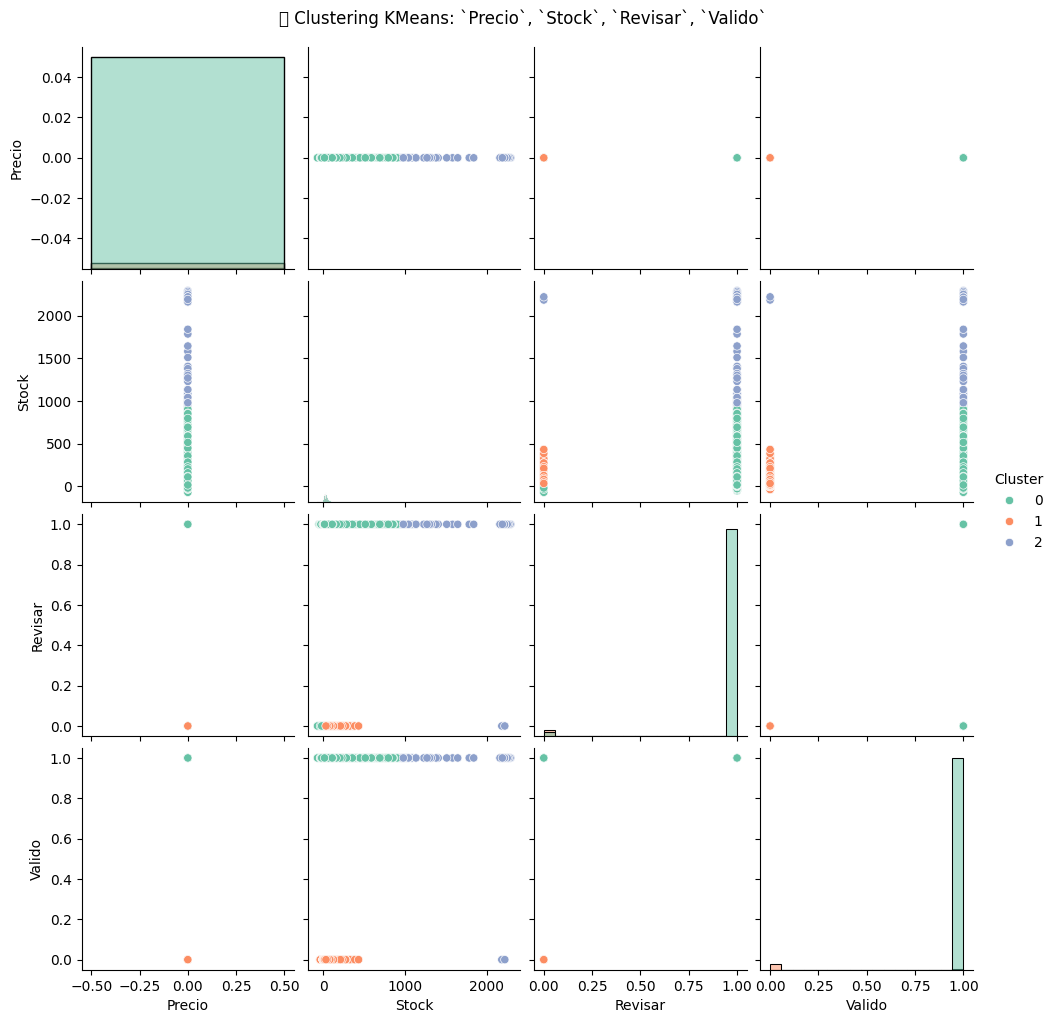

In [104]:
sns.pairplot(df_cluster, hue='Cluster', palette='Set2', diag_kind='hist')
plt.suptitle("🧠 Clustering KMeans: `Precio`, `Stock`, `Revisar`, `Valido`", y=1.02)
plt.show()


grilla de dispersión

In [105]:
# Ver métricas por grupo
df_cluster.groupby('Cluster').mean().round(2)


Precio    Stock  Revisar  Valido
Cluster                                  
0           0.0    50.10     0.98    1.00
1           0.0    48.07     0.00    0.00
2           0.0  1760.34     0.97    0.97

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.



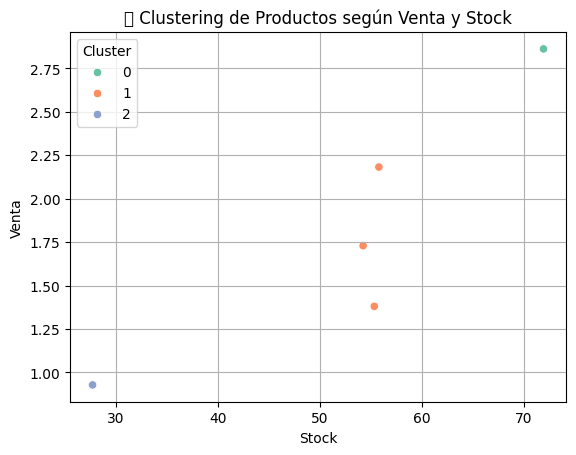

In [111]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Usar promedio por producto
agrupado = df.groupby('Producto')[['Venta', 'Stock']].mean().dropna()
scaler = StandardScaler()
X = scaler.fit_transform(agrupado)

kmeans = KMeans(n_clusters=3, random_state=42)
agrupado['Cluster'] = kmeans.fit_predict(X)

# Visualización
sns.scatterplot(data=agrupado, x='Stock', y='Venta', hue='Cluster', palette='Set2')
plt.title("🧠 Clustering de Productos según Venta y Stock")
plt.grid(True)
plt.show()


 un clustering no supervisado de productos según sus valores promedio de Stock y Venta, utilizando el algoritmo KMeans.